In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [108]:
# Abrimos la carpeta donde se encuentran las bases de datos
os.chdir(r"C:/Users\s1248850/OneDrive - Syngenta/Documents/Rosario Luque/Ciencias de datos/TP/TP3")
#os.chdir(r"c:\Users\s1290226\OneDrive - Syngenta\Desktop\UdeSA\Ciencia de datos\CC408-T2-3\TP4")
#os.chdir(r"C:\Users\clari\OneDrive\Documents\Tutoriales CD\CC408-T2-3\TP4")
#os.chdir(r"c:\Users\Teresa\Desktop\Cuarto año\Semestre de primavera\Ciencia de Datos\CC408-T2-3\TP4")

# Guardamos las bases de datos en en dos variables
ind_2004 = pd.read_stata("Individual_t104.dta")
hogar_2004 = pd.read_stata("Hogar_t104.dta")
ind_2024 = pd.read_excel("usu_individual_T124.xlsx")
hogar_2024 = pd.read_excel("usu_hogar_T124.xlsx")

In [109]:
ind_2004.shape, hogar_2004.shape, ind_2024.shape, hogar_2024.shape

((45289, 176), (12816, 88), (46050, 177), (16104, 88))

In [110]:
hogar_2024.columns

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV1_ESP', 'IV2', 'IV3',
       'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10',
       'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1',
       'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7',
       'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10',
       'IX_MAYEQ10', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR',
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2',
       'VII2_3', 'VII2_4'],
      dtype='object')

2. Descarguen la base de microdatos de la EPH correspondiente al primer trimestre de 2004 y 2024 en formato .dta y .xls, respectivamente. La base de hogares se llama Hogar_t104.dta y usu_hogar_T124.xls, respectivamente. Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires y unan ambos trimestres en una sola base. Esto es, a la base de la encuesta individual de cada año (que usaron en el TP3) unan la base de la encuesta de hogar. Asegúrese de estar usando las variables CODUSU y NRO_Hogar para el merge.

Para poder trabajar con las cuatro bases de datos es necesario primero pasar el nombre de todas las columnas a minúscula. Esto nos permitirá luego concatenar las bases de datos en una sola y preservar la estructura de la información.

In [111]:
# En la base de datos del 2024 los nombres de las columnas están en mayúsculas.
# Entonces, cambiamos los nombres de las columnas a minúsculas.
ind_2024.columns = ind_2024.columns.str.lower()
hogar_2024.columns = hogar_2024.columns.str.lower()

#Just in case, hacemos lo mismo para las bases del 2004.
ind_2004.columns = ind_2004.columns.str.lower()
hogar_2004.columns = hogar_2004.columns.str.lower()

Ahora eliminamos todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires, y unimos ambos trimestres de hogares e individuos en una sola base.

In [112]:
# Contar el número de filas en el dataframe ind_2004 que son 'Ciudad de Buenos Aires' o 'Partidos del GBA' en la columna "aglomerado"
count_32_33 = ind_2004[ind_2004['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 para el año 2004 es: {count_32_33}")
# Contar el número de filas en el dataframe ind_2024 que tienen el valor 32 y 33 en la columna "aglomerado"
count_32_33_2024 = ind_2024[ind_2024['aglomerado'].isin([32, 33])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 para el año 2024 es: {count_32_33_2024}")
# Contar el número de filas en el dataframe hogar_2004 que son 'Ciudad de Buenos Aires' o 'Partidos del GBA' en la columna "aglomerado"
count_32_33_hogar = hogar_2004[hogar_2004['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 en la base de hogares para el año 2004 es: {count_32_33_hogar}")
# Contar el número de filas en el dataframe hogar_2024 que tienen el valor 32 y 33 en la columna "aglomerado"
count_32_33_hogar_2024 = hogar_2024[hogar_2024['aglomerado'].isin([32, 33])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 en la base de hogares para el año 2024 es: {count_32_33_hogar_2024}")


El número de filas con aglomerado 32 y 33 para el año 2004 es: 7647
El número de filas con aglomerado 32 y 33 para el año 2024 es: 7051
El número de filas con aglomerado 32 y 33 en la base de hogares para el año 2004 es: 2351
El número de filas con aglomerado 32 y 33 en la base de hogares para el año 2024 es: 2545


In [113]:
# Primero filtramos los aglomerados de Ciudad Autónoma de Buenos Aires (32) y Gran Buenos Aires (33)
ind_2004 = ind_2004[ind_2004['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])]
ind_2024 = ind_2024[ind_2024['aglomerado'].isin([32, 33])]
hogar_2004 = hogar_2004[hogar_2004['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])]
hogar_2024 = hogar_2024[hogar_2024['aglomerado'].isin([32, 33])]

Antes de unir las bases de datos, vamos a quedarnos con las variables que usamos en el TP3 y vamos a reorganizar las variables. Seguramente tengamos que hacer esto con las bases de hogares, lo iremos haciendo al paso.

In [114]:
# Primero hacemos el recorte de variables de interés de la base de individuos en función de lo realizado en el tp3.
ind_2004 = ind_2004[['codusu', 'nro_hogar', 'ano4', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch15', 'ch16', 'nivel_ed', 'estado', 'v2_m', 'v5_m', 'v8_m', 'v9_m', 'v10_m', 'v11_m','v12_m', 'v18_m', 'v19_am', 'v21_m', 'ipcf']]
ind_2024 = ind_2024[['codusu', 'nro_hogar', 'ano4', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch15', 'ch16', 'nivel_ed', 'estado', 'v2_m', 'v5_m', 'v8_m', 'v9_m', 'v10_m', 'v11_m','v12_m', 'v18_m', 'v19_am', 'v21_m', 'ipcf']]
print(ind_2004.columns)
print(ind_2024.columns)

Index(['codusu', 'nro_hogar', 'ano4', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09',
       'ch15', 'ch16', 'nivel_ed', 'estado', 'v2_m', 'v5_m', 'v8_m', 'v9_m',
       'v10_m', 'v11_m', 'v12_m', 'v18_m', 'v19_am', 'v21_m', 'ipcf'],
      dtype='object')
Index(['codusu', 'nro_hogar', 'ano4', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09',
       'ch15', 'ch16', 'nivel_ed', 'estado', 'v2_m', 'v5_m', 'v8_m', 'v9_m',
       'v10_m', 'v11_m', 'v12_m', 'v18_m', 'v19_am', 'v21_m', 'ipcf'],
      dtype='object')


In [115]:
# Vamos a ver que valores únicos tienen las variables de la base de hogares de 2004.
print(ind_2004['ch16'].unique())
# Vamos a ver que valores únicos tiene las variables de la base de hogares de 2024.
print(ind_2024['ch16'].unique())

['En esta localidad', 'En un país limítrofe', 'No había nacido', 'En otra localidad de esta provincia', 'En otra provincia (especificar)', 'En otro país', 'Ns./Nr.']
Categories (7, object): ['En esta localidad' < 'En otra localidad de esta provincia' < 'En otra provincia (especificar)' < 'En un país limítrofe' < 'En otro país' < 'No había nacido' < 'Ns./Nr.']
[1 9 6 4 5 2 3 0]


In [116]:
# Ahora ajustamos las variables de la base de invididuos del 2004 para que tengan el mismo formato que las de 2024.
#ch04 = género
ind_2004['ch04'] = ind_2004['ch04'].replace({'Varón': 1, 'Mujer': 2})
ind_2004['ch04'] = pd.to_numeric(ind_2004['ch04'], errors='coerce')

# Se convierte a numérico los valores de ch06 (edades) de los datos de 2004, convirtiendo en na los valores que no son numeros.
ind_2004['ch06'] = pd.to_numeric(ind_2004['ch06'], errors='coerce')

#ch07 = estado civil
ind_2004['ch07'] = ind_2004['ch07'].replace({'Unido': 1, 'Casado': 2,'Separado o divorciado':3, 'Viudo':4,'Ns./Nr.':9,'Soltero':5})
ind_2004['ch07'] = pd.to_numeric(ind_2004['ch07'], errors='coerce')

#ch08 = cobertura médica
mapeosalud = {'Obra social (incluye PAMI)': 1,'No paga ni le descuentan': 2,'Mutual/Prepaga/Servicio de emergencia': 3,'Obra social y mutual/prepaga/servicio de emergencia': 12,'Planes y seguros públicos': 3,'Ns./Nr.': 9,  'Obra social, mutual/prepaga/servicio de emergencia y planes': 123,'Obra social y planes y seguros públicos': 13,'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23}
ind_2004['ch08'] = ind_2004['ch08'].map(mapeosalud)
ind_2004['ch08'] = pd.to_numeric(ind_2004['ch08'], errors='coerce')

#ch09 = leer y escribir
ind_2004['ch09'] = ind_2004['ch09'].replace({'Sí': 1, 'No': 2, 'Menor de 2 años': 3, 'Ns./Nr.': 9})
ind_2004['ch09'] = pd.to_numeric(ind_2004['ch09'], errors='coerce')

#ch15 = lugar de nacimiento
mapeoch15 = {'En esta localidad': 1, 'En otra localidad': 2, 'En otra provincia (especificar)': 3, 'En un país limítrofe': 4, 'En otro país': 5, 'Ns./Nr.': 9}
ind_2004['ch15'] = ind_2004['ch15'].map(mapeoch15)
ind_2004['ch15'] = pd.to_numeric(ind_2004['ch15'], errors='coerce')

#ch16 = lugar de residencia hace 5 años
mapeoch16 = {'En esta localidad': 1, 'En otra localidad': 2, 'En otra provincia (especificar)': 3, 'En un país limítrofe': 4, 'En otro país': 5, 'No había nacido': 6, 'Ns./Nr.': 9}
ind_2004['ch16'] = ind_2004['ch16'].map(mapeoch16)
ind_2004['ch16'] = pd.to_numeric(ind_2004['ch16'], errors='coerce')

ind_2024['ch16'] = ind_2024['ch16'].replace({0: 9})

#nivel_ed = nivel educativo alcanzado
mapeonivel = {'Primaria Incompleta (incluye educación especial)': 1,'Primaria Completa': 2,'Secundaria Incompleta': 3,'Secundaria Completa': 4,'Superior Universitaria Incompleta': 5,'Superior Universitaria Completa': 6,'Sin instrucción': 7,'Ns./ Nr.': 9  }
ind_2004['nivel_ed'] = ind_2004['nivel_ed'].map(mapeonivel)
ind_2004['nivel_ed'] = pd.to_numeric(ind_2004['nivel_ed'], errors='coerce')

#estado = estado laboral
mapeoestado = {'Entrevista individual no realizada (no respuesta al cuestion': 0,'Ocupado': 1,'Desocupado': 2,'Inactivo': 3,'Menor de 10 años': 4}
ind_2004['estado'] = ind_2004['estado'].map(mapeoestado)
ind_2004['estado'] = pd.to_numeric(ind_2004['estado'], errors='coerce')

#cat_inac= categoría de inactividad
#mapeoinac = {'Jubilado / Pensionado': 1,'Rentista': 2,'Estudiante': 3,'Ama de casa': 4,'Menor de 6 años': 5,'Discapacitado': 6,'Otros': 7, 0.0:9}
#ind_2004['cat_inac'] = ind_2004['cat_inac'].map(mapeoinac)
#ind_2004['cat_inac'] = pd.to_numeric(ind_2004['cat_inac'], errors='coerce')

#ind_2004['p47t'] = pd.to_numeric(ind_2004['p47t'], errors='coerce')

ind_2004['v2_m'] = pd.to_numeric(ind_2004['v2_m'], errors='coerce')

ind_2004['v5_m'] = pd.to_numeric(ind_2004['v5_m'], errors='coerce')

ind_2004['v8_m'] = pd.to_numeric(ind_2004['v8_m'], errors='coerce')

ind_2004['v9_m'] = pd.to_numeric(ind_2004['v9_m'], errors='coerce')

ind_2004['v10_m'] = pd.to_numeric(ind_2004['v10_m'], errors='coerce')

ind_2004['v11_m'] = pd.to_numeric(ind_2004['v11_m'], errors='coerce')

ind_2004['v12_m'] = pd.to_numeric(ind_2004['v12_m'], errors='coerce')

ind_2004['v18_m'] = pd.to_numeric(ind_2004['v18_m'], errors='coerce')

ind_2004['v19_am'] = pd.to_numeric(ind_2004['v19_am'], errors='coerce')

ind_2004['v21_m'] = pd.to_numeric(ind_2004['v21_m'], errors='coerce')

ind_2004['ipcf'] = pd.to_numeric(ind_2004['ipcf'], errors='coerce')



C:\Users\s1248850\AppData\Local\Temp\ipykernel_28252\2512962388.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ind_2004['ch04'] = ind_2004['ch04'].replace({'Varón': 1, 'Mujer': 2})
C:\Users\s1248850\AppData\Local\Temp\ipykernel_28252\2512962388.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  ind_2004['ch04'] = ind_2004['ch04'].replace({'Varón': 1, 'Mujer': 2})
C:\Users\s1248850\AppData\Local\Temp\ipykernel_28252\2512962388.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To ret

In [117]:
print(ind_2004.shape, ind_2024.shape)

(7647, 23) (7051, 23)


In [118]:
# Ahora chequeamos si hay nulls en la base de datos de 2004
print(ind_2004.isnull().sum())
# Hay 135 nas en la variable ch06
# Hay 668 nas en la variable cat_inac
print(ind_2004.shape, ind_2024.shape)

codusu         0
nro_hogar      0
ano4           0
ch04           0
ch06         135
ch07           0
ch08           0
ch09           0
ch15           0
ch16          24
nivel_ed       0
estado         0
v2_m           0
v5_m           0
v8_m           0
v9_m           0
v10_m          0
v11_m          0
v12_m          0
v18_m          0
v19_am         0
v21_m          0
ipcf           0
dtype: int64
(7647, 23) (7051, 23)


In [119]:
# Y si hay nulls en la base de datos de 2024
print(ind_2024.isnull().sum())
#No hay valores faltantes en la base de datos de 2024.
print(ind_2004.shape, ind_2024.shape)

codusu       0
nro_hogar    0
ano4         0
ch04         0
ch06         0
ch07         0
ch08         0
ch09         0
ch15         0
ch16         0
nivel_ed     0
estado       0
v2_m         0
v5_m         0
v8_m         0
v9_m         0
v10_m        0
v11_m        0
v12_m        0
v18_m        0
v19_am       0
v21_m        0
ipcf         0
dtype: int64
(7647, 23) (7051, 23)


In [120]:
# Eliminamos los nas
ind_2004 = ind_2004.dropna()
print(ind_2004.shape, ind_2024.shape)
ind_2024 = ind_2024.dropna()
print(ind_2004.shape, ind_2024.shape)

(7488, 23) (7051, 23)
(7488, 23) (7051, 23)


In [121]:
# Count the number of values 9 in each column for both datasets
count_9_ind_2004 = (ind_2004 == 9).sum()
print("Number of values 9 in each column for ind_2004:")
print(count_9_ind_2004)


Number of values 9 in each column for ind_2004:
codusu         0
nro_hogar      0
ano4           0
ch04           0
ch06         114
ch07           0
ch08          11
ch09           3
ch15           3
ch16           3
nivel_ed       0
estado         0
v2_m           0
v5_m           0
v8_m           0
v9_m           0
v10_m          0
v11_m          0
v12_m          0
v18_m          0
v19_am         0
v21_m          0
ipcf           0
dtype: int64


In [122]:
# Eliminar las filas donde las columnas respectivas toman el valor 0.
ind_2004 = ind_2004[ind_2004['ch08'] != 9]
ind_2004 = ind_2004[ind_2004['ch09'] != 9]
ind_2004 = ind_2004[ind_2004['ch15'] != 9]
ind_2004 = ind_2004[ind_2004['ch16'] != 9]

In [123]:
count_9_ind_2024 = (ind_2024 == 9).sum()
print("\nNumber of values 9 in each column for ind_2024:")
print(count_9_ind_2024)


Number of values 9 in each column for ind_2024:
codusu         0
nro_hogar      0
ano4           0
ch04           0
ch06         107
ch07          13
ch08          25
ch09          12
ch15          21
ch16          16
nivel_ed       0
estado         0
v2_m           0
v5_m           0
v8_m           0
v9_m           0
v10_m          0
v11_m          0
v12_m          0
v18_m          0
v19_am         0
v21_m          0
ipcf           0
dtype: int64


In [124]:
# Hay que eliminar las filas que valen 9 en las variables ch07, ch08, ch09, ch15 y ch16
ind_2024 = ind_2024[(ind_2024['ch07'] != 9) & 
                    (ind_2024['ch08'] != 9) & 
                    (ind_2024['ch09'] != 9) & 
                    (ind_2024['ch15'] != 9) & 
                    (ind_2024['ch16'] != 9)]

In [125]:
# Chequeamos si hay valores negativos en edad (ch06)
print((ind_2004['ch06']<0).sum())
print((ind_2024['ch06']<0).sum())
#Hay 51 valores negativos de edad en la base del 2024.
print(ind_2004.shape, ind_2024.shape)

0
50
(7475, 23) (7013, 23)


In [126]:
#Eliminamos los valores de edad que sean menores a 0 en ambas bases de datos.
ind_2024 = ind_2024[ind_2024['ch06'] >= 0]
ind_2004 = ind_2004[ind_2004['ch06'] >= 0]
print(ind_2004.shape, ind_2024.shape)

(7475, 23) (6963, 23)


In [127]:
# Chequeamos si hay valores negativos de IPCF.
print((ind_2004['ipcf']<0).sum())
print((ind_2024['ipcf']<0).sum())
# No hay valores negativos de IPCF en ninguna de las bases de datos.

0
0


In [128]:
# Chequeaamos si hay valores negativos de v2_m.
print((ind_2004['v2_m']<0).sum())
print((ind_2024['v2_m']<0).sum())
# Hay 174 valores negativos de v2_m en la base de 2024.

0
174


In [129]:
#Eliminamos los valores de v2_m que sean menores a 0 en ambas bases de datos.
ind_2024 = ind_2024[ind_2024['v2_m'] >= 0]
ind_2004 = ind_2004[ind_2004['v2_m'] >= 0]
print(ind_2004.shape, ind_2024.shape)

(7475, 23) (6789, 23)


In [130]:
# Chequeaamos si hay valores negativos de v5_m.
print((ind_2004['v5_m']<0).sum())
print((ind_2024['v5_m']<0).sum())
# Hay 42 valores negativos de v5_m en la base de 2024.

0
42


In [131]:
#Eliminamos los valores de v5_m que sean menores a 0 en ambas bases de datos.
ind_2024 = ind_2024[ind_2024['v5_m'] >= 0]
ind_2004 = ind_2004[ind_2004['v5_m'] >= 0]
print(ind_2004.shape, ind_2024.shape)

(7475, 23) (6747, 23)


In [132]:
# Chequeaamos si hay valores negativos de v8_m.
print((ind_2004['v8_m']<0).sum())
print((ind_2024['v8_m']<0).sum())
# Hay 18 valores negativos de v8_m en la base de 2024.

0
14


In [133]:
#Eliminamos los valores de v8_m que sean menores a 0 en ambas bases de datos.
ind_2024 = ind_2024[ind_2024['v8_m'] >= 0]
ind_2004 = ind_2004[ind_2004['v8_m'] >= 0]
print(ind_2004.shape, ind_2024.shape)

(7475, 23) (6733, 23)


In [134]:
# Chequeaamos si hay valores negativos de v9_m.
print((ind_2004['v9_m']<0).sum())
print((ind_2024['v9_m']<0).sum())
# Hay 3 valores negativos de v9_m en la base de 2024.

0
3


In [135]:
#Eliminamos los valores de v9_m que sean menores a 0 en ambas bases de datos.
ind_2024 = ind_2024[ind_2024['v9_m'] >= 0]
ind_2004 = ind_2004[ind_2004['v9_m'] >= 0]
print(ind_2004.shape, ind_2024.shape)

(7475, 23) (6730, 23)


In [136]:
# Chequeaamos si hay valores negativos de v10_m.
print((ind_2004['v10_m']<0).sum())
print((ind_2024['v10_m']<0).sum())
# Hay 40 valores negativos de v5_m en la base de 2024.

0
34


In [137]:
#Eliminamos los valores de v10_m que sean menores a 0 en ambas bases de datos.
ind_2024 = ind_2024[ind_2024['v10_m'] >= 0]
ind_2004 = ind_2004[ind_2004['v10_m'] >= 0]
print(ind_2004.shape, ind_2024.shape)

(7475, 23) (6696, 23)


In [138]:
# Chequeamos si hay valores negativos de v11_m.
print((ind_2004['v11_m']<0).sum())
print((ind_2024['v11_m']<0).sum())
# Hay 14 valores negativos de v11_m en la base de 2024.

0
14


In [139]:
#Eliminamos los valores de v11_m que sean menores a 0 en ambas bases de datos.
ind_2024 = ind_2024[ind_2024['v11_m'] >= 0]
ind_2004 = ind_2004[ind_2004['v11_m'] >= 0]
print(ind_2004.shape, ind_2024.shape)

(7475, 23) (6682, 23)


In [140]:
# Chequeaamos si hay valores negativos de v12_m.
print((ind_2004['v12_m']<0).sum())
print((ind_2024['v12_m']<0).sum())
# Hay 52 valores negativos de v12_m en la base de 2024.

0
38


In [141]:
#Eliminamos los valores de v12_m que sean menores a 0 en ambas bases de datos.
ind_2024 = ind_2024[ind_2024['v12_m'] >= 0]
ind_2004 = ind_2004[ind_2004['v12_m'] >= 0]
print(ind_2004.shape, ind_2024.shape)

(7475, 23) (6644, 23)


In [142]:
# Chequeaamos si hay valores negativos de v18_m.
print((ind_2004['v18_m']<0).sum())
print((ind_2024['v18_m']<0).sum())
# Hay 2 valores negativos de v12_m en la base de 2024.

0
1


In [143]:
#Eliminamos los valores de v18_m que sean menores a 0 en ambas bases de datos.
ind_2024 = ind_2024[ind_2024['v18_m'] >= 0]
ind_2004 = ind_2004[ind_2004['v18_m'] >= 0]
print(ind_2004.shape, ind_2024.shape)

(7475, 23) (6643, 23)


In [144]:
# Chequeaamos si hay valores negativos de v19_m.
print((ind_2004['v19_am']<0).sum())
print((ind_2024['v19_am']<0).sum())
# No hay valores negativos.

0
0


In [145]:
# Chequeaamos si hay valores negativos de v21_m.
print((ind_2004['v21_m']<0).sum())
print((ind_2024['v21_m']<0).sum())
# Hay 73 valores negativos de v21_m en la base de 2024.

0
18


In [146]:
#Eliminamos los valores de v21_m que sean menores a 0 en ambas bases de datos.
ind_2024 = ind_2024[ind_2024['v21_m'] >= 0]
ind_2004 = ind_2004[ind_2004['v21_m'] >= 0]
print(ind_2004.shape, ind_2024.shape)

(7475, 23) (6625, 23)


Una vez limpias las bases de individuos, procedemos a limpiar las bases de hogares.
Debido al tema de que las variables del 2004 hay que transformarlas, antes que nada vamos a chequear los nans. Esto implica tanto chequear los nans como tales como los nans encubiertos, estos que toman el valor 'Ns./Nr.".

In [147]:
# Filtrar columnas que tienen valores faltantes
nas_columns = hogar_2004.isnull().sum()
nas_columns = nas_columns[nas_columns > 0]
print(nas_columns)

ix_men10    1576
dtype: int64


In [148]:
# Filtrar columnas que tienen valores faltantes
nas_columns_2024 = hogar_2024.isnull().sum()
nas_columns_2024 = nas_columns_2024[nas_columns_2024 > 0]
print(nas_columns_2024)

iv1_esp    2541
iv3_esp    2543
iv7_esp    2540
ii7_esp    2538
ii8_esp    2448
idecifr    2545
pdecifr    2545
ideccfr    2545
pdeccfr    2545
dtype: int64


In [149]:
# Count the number of 'Ns./Nr.' values in each column of the hogar_2004 dataframe
ns_nr_counts = (hogar_2004 == 'Ns./Nr.').sum()

# Filter columns that have 'Ns./Nr.' values
ns_nr_counts_filtered = ns_nr_counts[ns_nr_counts > 0]

if not ns_nr_counts_filtered.empty:
    print("Number of 'Ns./Nr.' values in each column:")
    print(ns_nr_counts_filtered)
else:
    print("No columns contain 'Ns./Nr.' values.")

Number of 'Ns./Nr.' values in each column:
iv5       2
v2        1
v21       1
v22       1
v3        1
v4        1
v5        1
v6        1
v7        1
v8        1
v9        1
v10       1
v11       1
v12       1
v13       2
v14       1
v15       1
v16       1
v17       1
v18       1
v19_a     1
v19_b     1
vii1_1    1
dtype: int64


In [150]:
# Count the number of 9 values in each column of the hogar_2024 dataframe
count_9_hogar_2024 = (hogar_2024 == 9).sum()
# Filter columns that have more than 50 rows with the value 9
count_9_hogar_2024_filtered_50 = count_9_hogar_2024[count_9_hogar_2024 > 50]

if not count_9_hogar_2024_filtered_50.empty:
    print("Columns with more than 50 rows taking the value 9:")
    print(count_9_hogar_2024_filtered_50)
else:
    print("No columns have more than 50 rows taking the value 9.")


Columns with more than 50 rows taking the value 9:
iv4        284
decifr     158
rdecifr    133
gdecifr    152
adecifr    128
deccfr     184
rdeccfr    168
gdeccfr    180
adeccfr    171
dtype: int64


In [151]:
columns_to_retain = ['codusu', 'nro_hogar', 'ano4', 'iv1', 'iv2', 'iv3', 'iv4', 'iv5', 'iv6', 'iv7', 'iv8', 'iv9', 'iv10', 'iv11', 'iv12_1', 'iv12_2', 
                     'iv12_3', 'ii6_1', 'ii7', 'v1', 'v2', 'v21', 'v22', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 
                     'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'ix_tot', 'ix_mayeq10', 'itf']

hogar_2004 = hogar_2004[columns_to_retain]
hogar_2024 = hogar_2024[columns_to_retain]

In [152]:
# Vamos a ver que valores únicos tienen las variables de la base de hogares de 2004.
print(hogar_2004['iv2'].unique())
# Vamos a ver que valores únicos tiene las variables de la base de hogares de 2024.
print(hogar_2024['iv2'].unique())

[3.0, 2.0, 4.0, 5.0, 1.0, ..., 12.0, 31.0, 9.0, 33.0, 11.0]
Length: 14
Categories (19, object): [0.0 < 1.0 < 2.0 < 3.0 ... 31.0 < 33.0 < 41.0 < 'Ns./Nr.']
[ 3  6  5  2  4  1  7  8 99]


In [153]:
# Dado que la base de datos de hogares del 2004 tiene la descripción como valor en vez del valor numérico, vamos a cambiarlo.

mapeo_SN = {'Sí': 1, 'No': 2, 'Ns./Nr.':9, 0.0:9}

mapeo_iv1 = {'Casa':1, 'Departamento':2, 'Pieza de inquilinato':3, 'Pieza en hotel/pensión/residencial':4, 'Local no construido para habitación':5, 'Otro':6}
hogar_2004['iv1'] = hogar_2004['iv1'].map(mapeo_iv1)
hogar_2004['iv1'] = pd.to_numeric(hogar_2004['iv1'], errors='coerce')

hogar_2004['iv2'] = pd.to_numeric(hogar_2004['iv2'], errors='coerce')

mapeo_iv3 = {'Mosaico/baldosa/madera/cerámica/alfombra':1, 'Cemento/ladrillo fijo':2, 'Ladrillo suelto/tierra':3, 'Otro':4, 0.0:9}
hogar_2004['iv3'] = hogar_2004['iv3'].map(mapeo_iv3)
hogar_2004['iv3'] = pd.to_numeric(hogar_2004['iv3'], errors='coerce')

mapeo_iv4 = {'Membrana/cubierta asfáltica':1, 'N/S. Depto. de propiedad horizontal':9, 'Baldosa/losa sin cubierta':2, 'Chapa de metal sin cubierta':4, 'Chapa de fibrocemento/plástico':5, 'Pizarra/teja':3, 0.0:9, 'Chapa de cartón':6}
hogar_2004['iv4'] = hogar_2004['iv4'].map(mapeo_iv4)
hogar_2004['iv4'] = pd.to_numeric(hogar_2004['iv4'], errors='coerce')

hogar_2004['iv5'] = hogar_2004['iv5'].map(mapeo_SN)
hogar_2004['iv5'] = pd.to_numeric(hogar_2004['iv5'], errors='coerce')

mapeo_iv6 = {'Por cañería dentro de la vivienda': 1, 0.0:9, 'Fuera del terreno': 2, 'Fuera de la vivienda pero dentro del terreno':3}
hogar_2004['iv6'] = hogar_2004['iv6'].map(mapeo_iv6)
hogar_2004['iv6'] = pd.to_numeric(hogar_2004['iv6'], errors='coerce')

mapeo_iv7 = {'Red pública (agua corriente)':1, 'Otra fuente':4, 'Perforación con bomba a motor':2, 'Perforación con bomba manual':3, 0.0:9}
hogar_2004['iv7'] = hogar_2004['iv7'].map(mapeo_iv7)
hogar_2004['iv7'] = pd.to_numeric(hogar_2004['iv7'], errors='coerce')

hogar_2004['iv8'] = hogar_2004['iv8'].map(mapeo_SN)
hogar_2004['iv8'] = pd.to_numeric(hogar_2004['iv8'], errors='coerce')

mapeo_iv9 = {'Dentro de la vivienda': 1, 'Fuera de la vivienda pero dentro del terreno': 2, 'Fuera del terreno':3, 0.0:9}
hogar_2004['iv9'] = hogar_2004['iv9'].map(mapeo_iv9)
hogar_2004['iv9'] = pd.to_numeric(hogar_2004['iv9'], errors='coerce')

mapeo_iv10 = {'Inodoro con botón/mochila/cadena y arrastre de agua':1, 'Inodoro sin botón/cadena y con arrastre de agua':2, 0.0:9, 'Letrina (sin arrastre de agua)':3}
hogar_2004['iv10'] = hogar_2004['iv10'].map(mapeo_iv10)
hogar_2004['iv10'] = pd.to_numeric(hogar_2004['iv10'], errors='coerce')

mapeo_iv11 = {'A red pública (cloaca)': 1, 'A cámara séptica y pozo ciego':2, 'Sólo a pozo ciego':3, 'Ns/Nr':9, 0.0:9, 'A hoyo/excavación en la tierra':4}
hogar_2004['iv11'] = hogar_2004['iv11'].map(mapeo_iv11)
hogar_2004['iv11'] = pd.to_numeric(hogar_2004['iv11'], errors='coerce')

hogar_2004['iv12_1'] = hogar_2004['iv12_1'].map(mapeo_SN)
hogar_2004['iv12_1'] = pd.to_numeric(hogar_2004['iv12_1'], errors='coerce')

hogar_2004['iv12_2'] = hogar_2004['iv12_2'].map(mapeo_SN)
hogar_2004['iv12_2'] = pd.to_numeric(hogar_2004['iv12_2'], errors='coerce')

hogar_2004['iv12_3'] = hogar_2004['iv12_3'].map(mapeo_SN)
hogar_2004['iv12_3'] = pd.to_numeric(hogar_2004['iv12_3'], errors='coerce')

mapeo_ii7 = {'Otra situación':9, 'Propietario de la vivienda y el terreno':1, 'Inquilino/arrendatario de la vivienda':3, 'Ocupante por pago de impuestos/expensas':4, 'Propietario de la vivienda solamente':2, 'Ocupante gratuito (con permiso)':6, 'Ocupante en relación de dependencia':5, 'Ocupante de hecho (sin permiso)':7, 'Está en sucesión':8,0.0:9}
hogar_2004['ii7'] = hogar_2004['ii7'].map(mapeo_ii7)
hogar_2004['ii7'] = pd.to_numeric(hogar_2024['ii7'], errors='coerce')

for col in ['v1', 'v2', 'v21', 'v22', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b']:
    hogar_2004[col] = hogar_2004[col].map(mapeo_SN)
    hogar_2004[col] = pd.to_numeric(hogar_2004[col], errors='coerce')

hogar_2004['ix_tot'] = pd.to_numeric(hogar_2004['ix_tot'], errors='coerce')

#hogar_2004['ix_men10'] = pd.to_numeric(hogar_2004['ix_men10'], errors='coerce')

hogar_2004['ix_mayeq10'] = pd.to_numeric(hogar_2004['ix_mayeq10'], errors='coerce')

hogar_2004['itf'] = pd.to_numeric(hogar_2004['itf'], errors='coerce')

In [154]:
#Chequeo el número de nas para las variables seleccionadas.
print(hogar_2004.isnull().sum())
print(hogar_2004.columns[hogar_2004.isnull().any()])

codusu           0
nro_hogar        0
ano4             0
iv1              4
iv2              0
iv3              0
iv4              0
iv5              0
iv6              0
iv7              0
iv8              0
iv9              0
iv10             0
iv11             0
iv12_1           0
iv12_2           0
iv12_3           0
ii6_1            0
ii7           2075
v1               0
v2               0
v21              0
v22              0
v3               0
v4               0
v5               0
v6               0
v7               0
v8               0
v9               0
v10              0
v11              0
v12              0
v13              0
v14              0
v15              0
v16              0
v17              0
v18              0
v19_a            0
v19_b            0
ix_tot           0
ix_mayeq10       0
itf              0
dtype: int64
Index(['iv1', 'ii7'], dtype='object')


In [155]:
# Dado que la variable ii7 tiene muchos nans, la vamos a excluir de la base de datos.
hogar_2004 = hogar_2004.drop(columns = ['ii7'])

In [156]:
hogar_2004 = hogar_2004.dropna()
hogar_2004.shape

(2347, 43)

In [157]:
hogar_2024 = hogar_2024.drop(columns = ['ii7'])

In [158]:
# Ahora chequeamos los valores faltantes para la base del 2024.
print(hogar_2024.isnull().sum())
print(hogar_2024.columns[hogar_2024.isnull().any()])

codusu        0
nro_hogar     0
ano4          0
iv1           0
iv2           0
iv3           0
iv4           0
iv5           0
iv6           0
iv7           0
iv8           0
iv9           0
iv10          0
iv11          0
iv12_1        0
iv12_2        0
iv12_3        0
ii6_1         0
v1            0
v2            0
v21           0
v22           0
v3            0
v4            0
v5            0
v6            0
v7            0
v8            0
v9            0
v10           0
v11           0
v12           0
v13           0
v14           0
v15           0
v16           0
v17           0
v18           0
v19_a         0
v19_b         0
ix_tot        0
ix_mayeq10    0
itf           0
dtype: int64
Index([], dtype='object')


In [159]:
#Chequeo que las variables itf, ix_mayeq10, e ix_tot no tengan valores negativos.
print((hogar_2004['itf']<0).sum())
print((hogar_2004['ix_mayeq10']<0).sum())
print((hogar_2004['ix_tot']<0).sum())

0
0
0


In [160]:
#Chequeo que las variables itf, ix_men10, e ix_tot no tengan valores negativos.
print((hogar_2024['itf']<0).sum())
print((hogar_2024['ix_mayeq10']<0).sum())
print((hogar_2024['ix_tot']<0).sum())

0
0
0


In [161]:
count_9_hogar_2004 = (hogar_2004 == 9).sum()
print("\nNumber of values 9 in each column for ind_2024:")
print(count_9_hogar_2004)


Number of values 9 in each column for ind_2024:
codusu          0
nro_hogar       0
ano4            0
iv1             0
iv2             1
iv3             2
iv4           268
iv5             2
iv6             5
iv7             1
iv8             1
iv9            18
iv10           18
iv11           21
iv12_1          1
iv12_2          2
iv12_3          1
ii6_1           0
v1              0
v2              1
v21             1
v22             1
v3              1
v4              1
v5              1
v6              3
v7              1
v8              1
v9              1
v10             1
v11             1
v12             1
v13             2
v14             1
v15             1
v16             1
v17             1
v18             1
v19_a           1
v19_b           1
ix_tot         18
ix_mayeq10      2
itf             0
dtype: int64


In [162]:
#Retain rows where no column has the value 9
hogar_2004 = hogar_2004[(hogar_2004 != 9).all(axis=1)]

#Display the shape of the filtered dataframe
print(hogar_2004.shape)

(2025, 43)


In [163]:
# Retain rows where no column has the value 9
hogar_2024 = hogar_2024[(hogar_2024 != 9).all(axis=1)]

# Display the shape of the filtered dataframe
print(hogar_2024.shape)

(2246, 43)


In [164]:
ind_2004.shape, hogar_2004.shape, ind_2024.shape, hogar_2024.shape

((7475, 23), (2025, 43), (6625, 23), (2246, 43))

Ahora sí, una vez eliminados los valores faltantes y los valores sin sentido, además de transformar las variables, procedemos a unir las bases de datos.

In [165]:
# Verificar las claves en todas las bases
claves = ["codusu", "nro_hogar"]
for df, name in zip([ind_2004, hogar_2004, ind_2024, hogar_2024],
                    ["individual_2004", "hogar_2004", "individual_2024", "hogar_2024"]):
    if not all(clave in df.columns for clave in claves):
        raise ValueError(f"Faltan claves en la base {name}")

# Unir las bases individuales y de hogar para cada año
base_2004 = pd.merge(ind_2004, hogar_2004, on=claves, how="inner")
base_2024 = pd.merge(ind_2024, hogar_2024, on=claves, how="inner")

# Agregar columna de año
base_2004["Año"] = 2004
base_2024["Año"] = 2024

# Combinar ambas bases en un solo DataFrame
base_final = pd.concat([base_2004, base_2024], ignore_index=True)

In [166]:
base_final.shape


(12584, 65)

3. Limpien la base de datos tomando criterios que hagan sentido. Explicar cualquier decisión como el tratamiento de valores faltantes (missing values), extremos (outliers), o variables categóricas. Justifique sus decisiones.

In [167]:
# Check for missing values in base_final
missing_values_base_final = base_final.isnull().sum()
missing_columns_base_final = missing_values_base_final[missing_values_base_final > 0]

if not missing_columns_base_final.empty:
    print("Columnas con valores faltantes y su cantidad de NAs:")
    print(missing_columns_base_final)
else:
    print("No hay columnas con valores faltantes en base_final.")

No hay columnas con valores faltantes en base_final.


In [168]:
base_final = base_final.dropna()

In [169]:
base_final.to_excel("base_final.xlsx", index=False)

Ahora vamos a chequear outliers

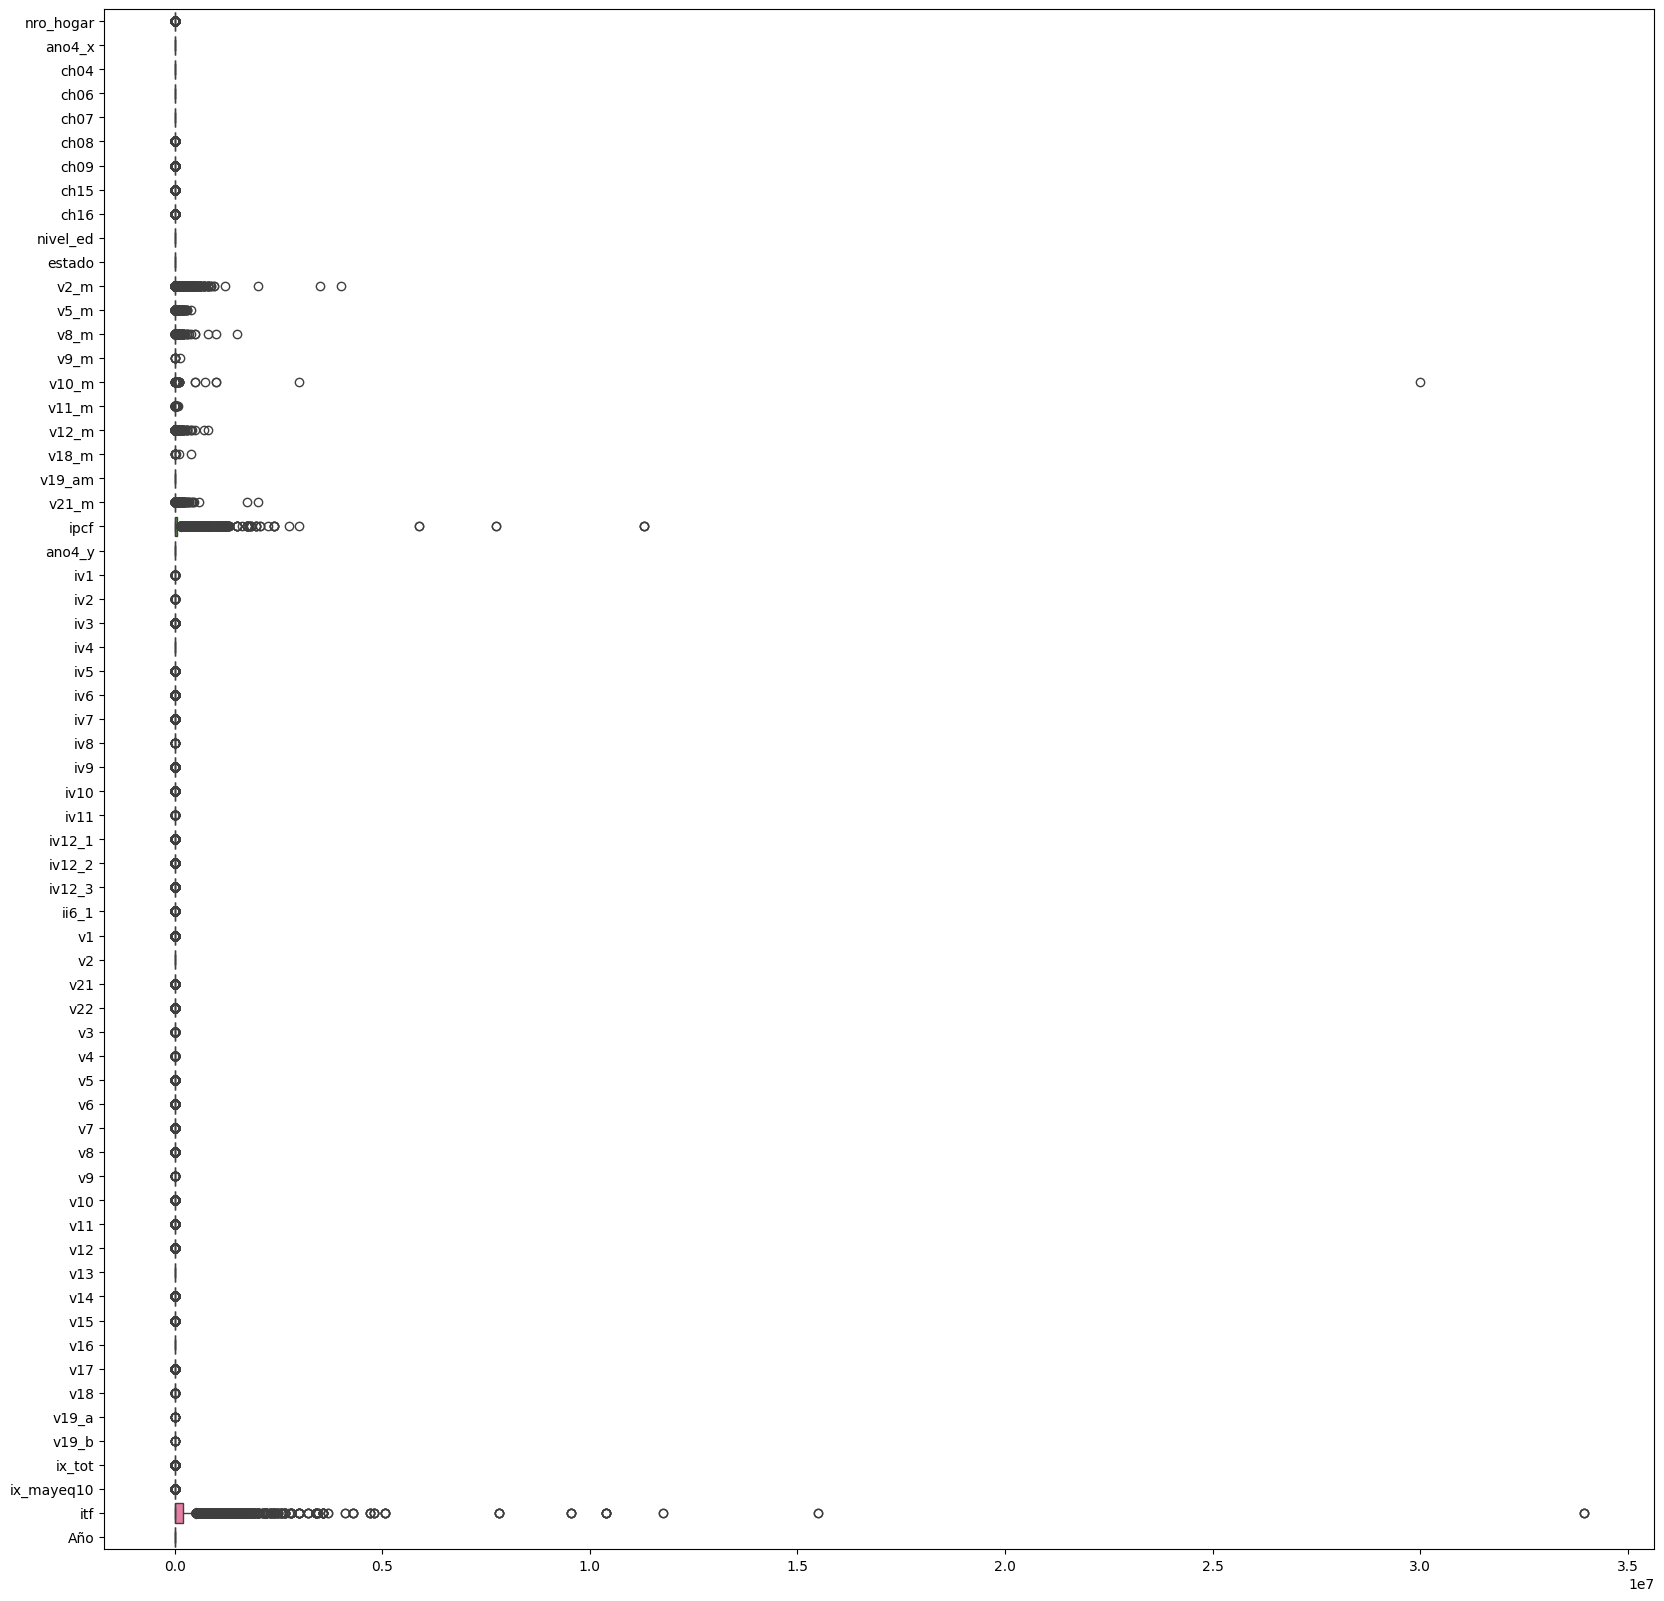

In [170]:
# Lo primero que debemos hacer es plotear boxplots para ver la distribución de las variables.
plt.figure(figsize=(20, 20))
sns.boxplot(data=base_final, orient="h")
plt.show()
# Vemos que ipcf e itf, las variables de ingreso, parecieran tener outliers. Ninguna variable toma valores negativos,
# por lo que la limpieza previa funcionó.

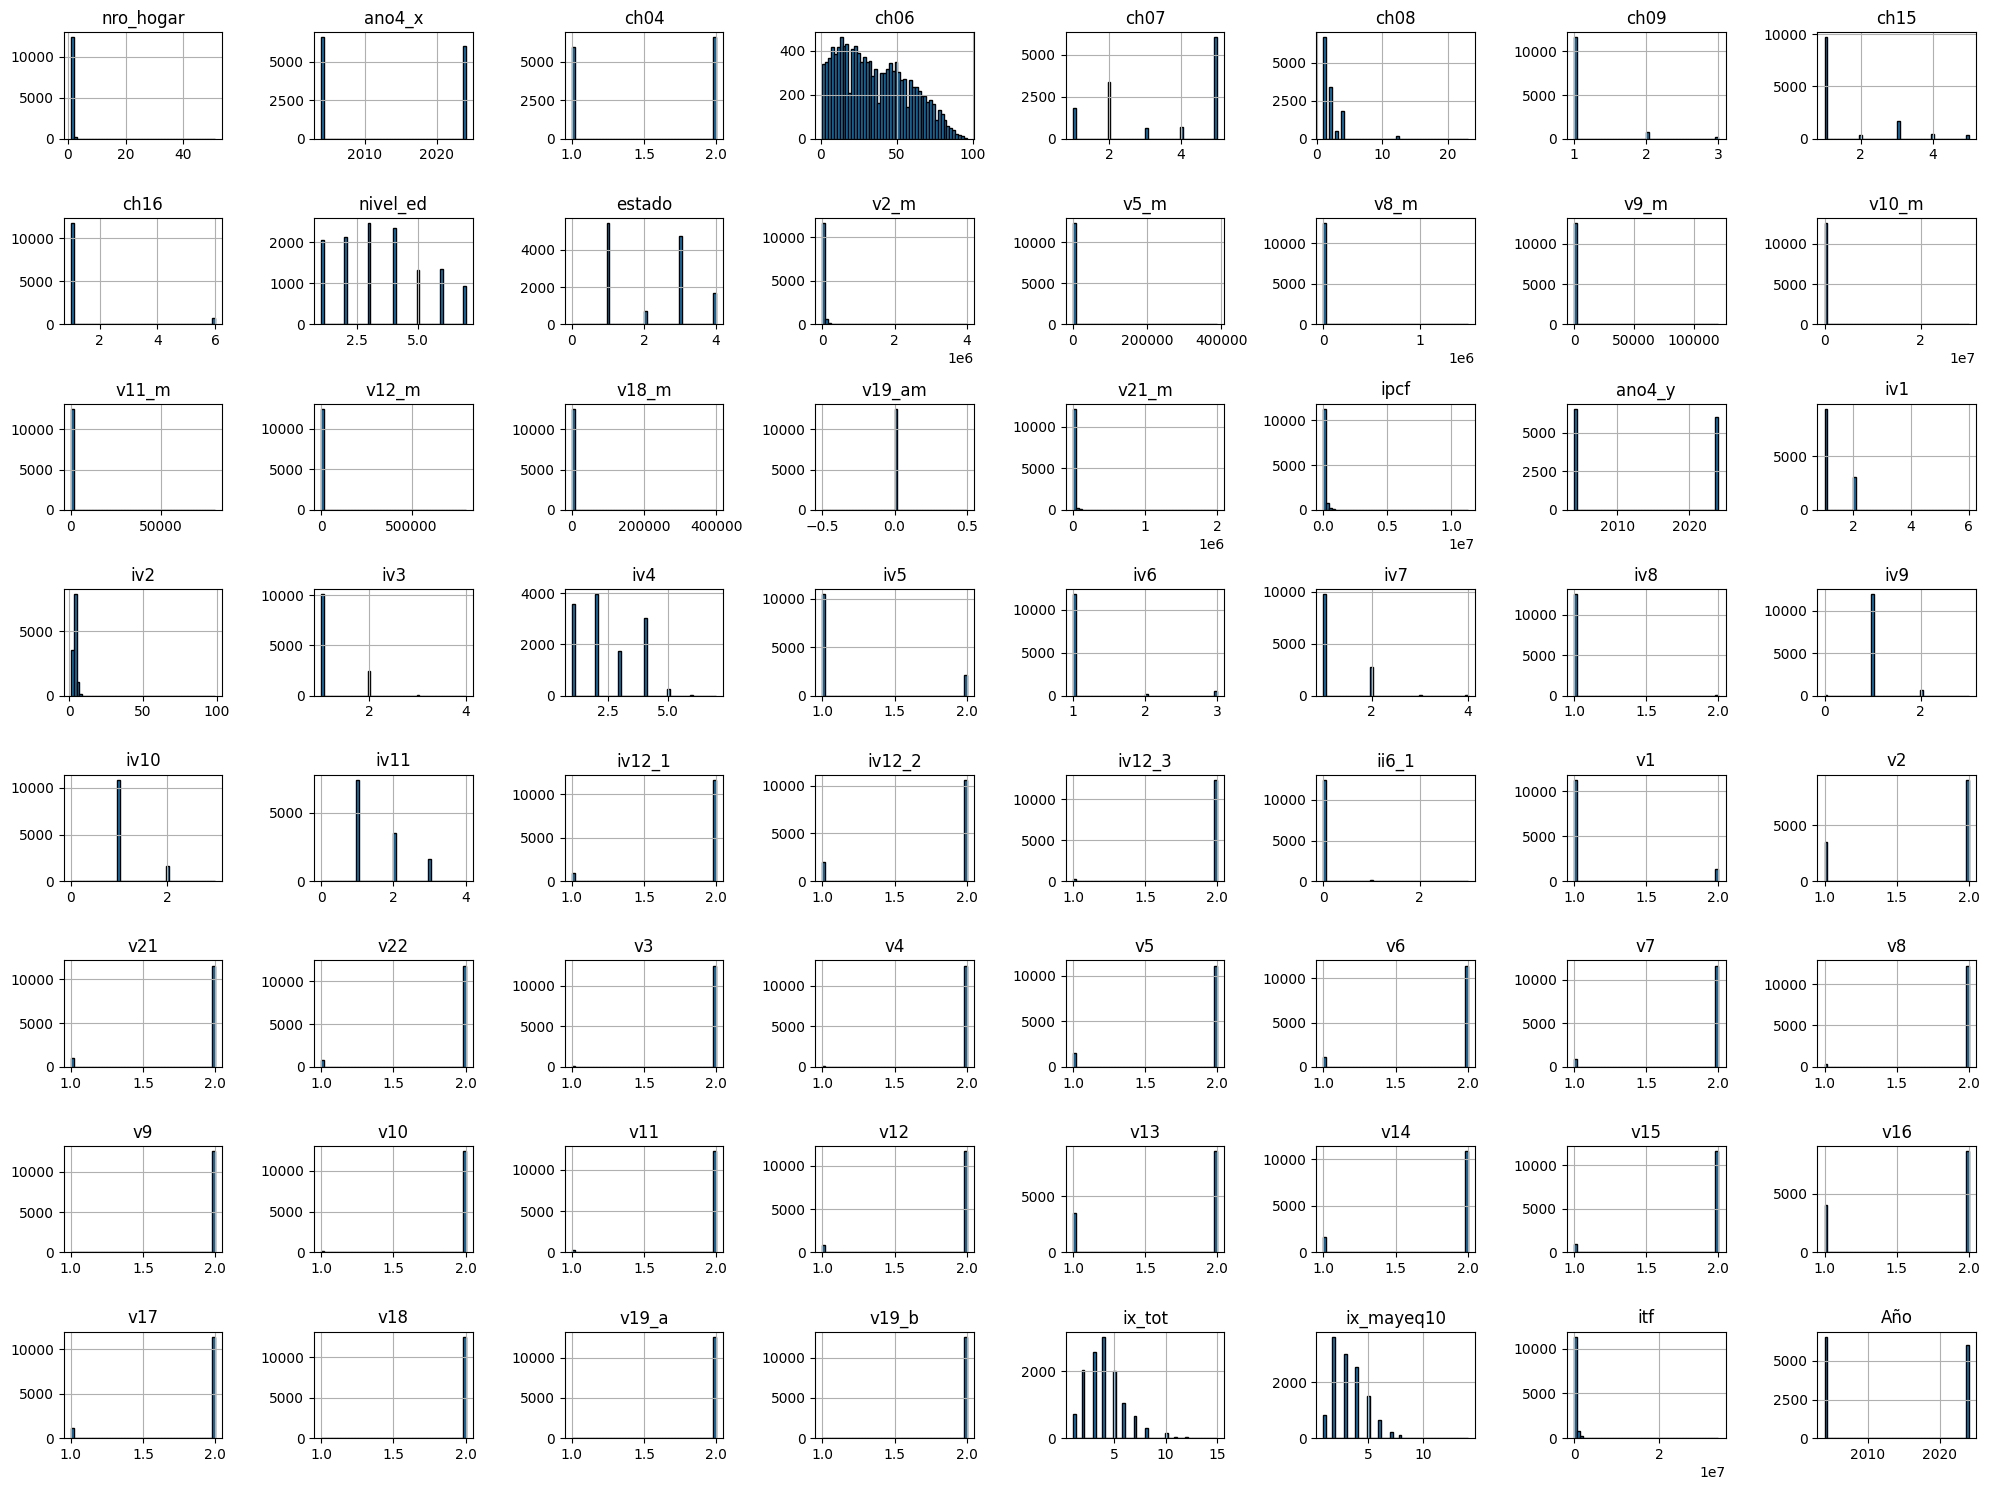

In [171]:
# Otra herramienta útil para ver la distribución de las variables es el histograma.
#El histograma nos permite ver si es necesario transformar alguna variable.
base_final.hist(figsize=(20, 15), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()

In [172]:
# Ahora sí, vamos a proceder a identificar los outliers las columnas de interés.
# Para ello, vamos a usar el método de la desviación absoluta media (MAD).
# Install pyod package
#%pip install pyod

# Import MAD estimator
from pyod.models.mad import MAD

# Se suele utilizar un umbral de 3.5 para considerar que un punto de datos es un outlier.
mad = MAD(threshold = 3.5)
columns_with_outliers = ['ch06', 'ch08', 'v5_m', 'v11_m', 'v12_m', 'ipcf', 'itf', 'ix_tot', 'ix_mayeq10']

for column in columns_with_outliers:
    # Para calcular el Z-score modificado, primero debemos tranformar las columnas en 2D numpy arrays.
    total_reshaped = base_final[column].values.reshape(-1, 1)

    # Clasificamos los puntos de datos en outliers (1) y no outliers (0)
    labels = mad.fit(total_reshaped).labels_
    print(f'Outliers for {column}: {np.sum(labels == 1)}')

Outliers for ch06: 0
Outliers for ch08: 5927
Outliers for v5_m: 329
Outliers for v11_m: 72
Outliers for v12_m: 305
Outliers for ipcf: 3666
Outliers for itf: 3603
Outliers for ix_tot: 249
Outliers for ix_mayeq10: 41


c:\Users\s1248850\AppData\Local\anaconda3\envs\Rosario\Lib\site-packages\pyod\models\mad.py:129: RuntimeWarning: divide by zero encountered in divide
  return np.nan_to_num(np.ravel(0.6745 * diff / self.median_diff_))
c:\Users\s1248850\AppData\Local\anaconda3\envs\Rosario\Lib\site-packages\pyod\models\mad.py:129: RuntimeWarning: invalid value encountered in divide
  return np.nan_to_num(np.ravel(0.6745 * diff / self.median_diff_))
c:\Users\s1248850\AppData\Local\anaconda3\envs\Rosario\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\s1248850\AppData\Local\anaconda3\envs\Rosario\Lib\site-packages\pyod\models\mad.py:129: RuntimeWarning: divide by zero encountered in divide
  return np.nan_to_num(np.ravel(0.6745 * diff / self.median_diff_))
c:\Users\s1248850\AppData\Local\anaconda3\envs\Rosario\Lib\site-packages\pyod\models\mad.py:129: RuntimeWarning: invalid value encountered

In [173]:
# Por último, filtramos los outliers de cada columna y nos quedamos con un nuevo df.
df_unificado = base_final.copy()
df_unificado = df_unificado[labels == 0]
df_unificado.shape

(12543, 65)

4. Construya variables (mínimo 3) que no estén en la base pero que sean relevantes para predecir individuos desocupados (por ejemplo, la proporción de personas que trabajan en el hogar).

In [174]:
print(df_unificado['estado'].unique())

[3 1 2 4 0]


In [175]:
# Primero, vamos a crear las variables que utilizamos en el tp3 para la predicción del desempleo.
# La columna PEA (Población Económicamente Activa) que toma 1 si están ocupados o desocupados en ESTADO.
df_unificado['PEA'] = df_unificado['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

In [176]:
print(df_unificado['PEA'].unique())

[0 1]


In [177]:
# La columna PET (Población en Edad para Trabajar) toma 1 si están la persona tiene entre 15 y 65 años cumplidos. 
df_unificado['PET'] = df_unificado['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

In [178]:
print(df_unificado['PET'].unique())

[0 1]


In [179]:
# Agregamos una columna llamada desocupado que tome 1 si esta desocupada
df_unificado['desocupado'] = df_unificado['estado'].apply(lambda x: 1 if x == 2 else 0)


In [180]:
print(df_unificado['desocupado'].unique())

[0 1]


In [181]:
# Ahora vamos a crear una nueva columna que contenga la proporción de personas que trabajan en el hogar.
# Para esto, vamos a dividir la cantidad de personas ocupadas en el hogar por la cantidad total de personas en el hogar.
df_unificado['prop_ocupados'] = df_unificado['PEA'] / df_unificado['ix_tot']

# Ahora vamos a crear una nueva columna que contenga la proporción de personas que reciben subsidio o ayuda social en el hogar.
# Para esto, vamos a dividir la cantidad de personas que reciben subsidio o ayuda social en el hogar por la cantidad total de personas en el hogar.
df_unificado['prop_subsidio'] = base_final['v5'] / df_unificado['ix_tot']

# Crear una nueva columna que contenga la proporción de personas menores de 10 años en el hogar.
# Para esto, vamos a dividir la cantidad de personas menores de 10 años en el hogar por la cantidad total de personas en el hogar.
df_unificado['prop_mayores_10'] = df_unificado['ix_mayeq10'] / df_unificado['ix_tot']

In [182]:
df_unificado.columns

Index(['codusu', 'nro_hogar', 'ano4_x', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09',
       'ch15', 'ch16', 'nivel_ed', 'estado', 'v2_m', 'v5_m', 'v8_m', 'v9_m',
       'v10_m', 'v11_m', 'v12_m', 'v18_m', 'v19_am', 'v21_m', 'ipcf', 'ano4_y',
       'iv1', 'iv2', 'iv3', 'iv4', 'iv5', 'iv6', 'iv7', 'iv8', 'iv9', 'iv10',
       'iv11', 'iv12_1', 'iv12_2', 'iv12_3', 'ii6_1', 'v1', 'v2', 'v21', 'v22',
       'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13',
       'v14', 'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'ix_tot',
       'ix_mayeq10', 'itf', 'Año', 'PEA', 'PET', 'desocupado', 'prop_ocupados',
       'prop_subsidio', 'prop_mayores_10'],
      dtype='object')

In [183]:
df_unificado.drop(columns=['ano4_x','ano4_y'], inplace=True)

5. Presenten estadísticas descriptivas de tres variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir la desocupación. Comenten las estadísticas obtenidas.

Los valores que toma la variable iv4 en el 2004 son: iv4
1.0    2331
2.0    1845
3.0     937
4.0    1211
5.0     185
6.0      20
Name: count, dtype: int64
Los valores que toma la variable iv4 en el 2024 son: iv4
1.0    1254
2.0    2115
3.0     787
4.0    1800
5.0      54
7.0       4
Name: count, dtype: int64


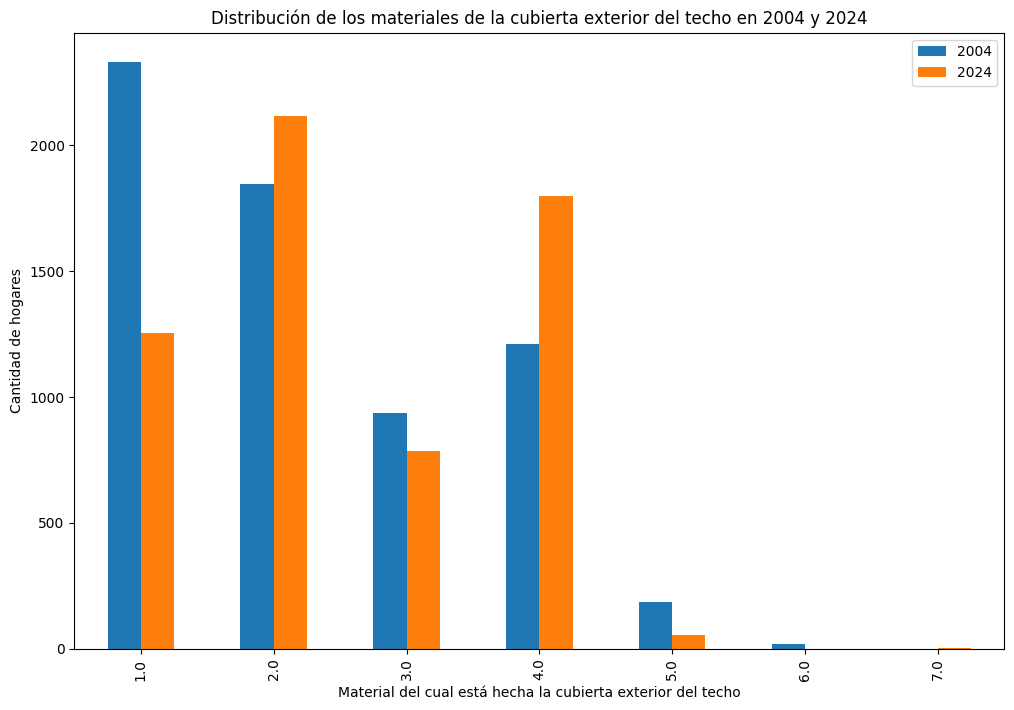

In [184]:
# Filter the data for each year
iv4_2004 = df_unificado[df_unificado['Año'] == 2004]['iv4'].value_counts().sort_index()
iv4_2024 = df_unificado[df_unificado['Año'] == 2024]['iv4'].value_counts().sort_index()

# Verificar los valores en iv4 para 2004 y 2024
print('Los valores que toma la variable iv4 en el 2004 son:', iv4_2004)
print('Los valores que toma la variable iv4 en el 2024 son:', iv4_2024)

# Create a DataFrame to hold the counts for each year
iv4_comparison = pd.DataFrame({'2004': iv4_2004, '2024': iv4_2024}).fillna(0)

# Plot the bar chart
iv4_comparison.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Material del cual está hecha la cubierta exterior del techo')
plt.ylabel('Cantidad de hogares')
plt.title('Distribución de los materiales de la cubierta exterior del techo en 2004 y 2024')
plt.show()

Los valores que toma la variable iv7 en el 2004 son: iv7
1.0    4904
2.0    1561
3.0      56
4.0       8
Name: count, dtype: int64
Los valores que toma la variable iv7 en el 2024 son: iv7
1.0    4836
2.0    1146
3.0      14
4.0      18
Name: count, dtype: int64


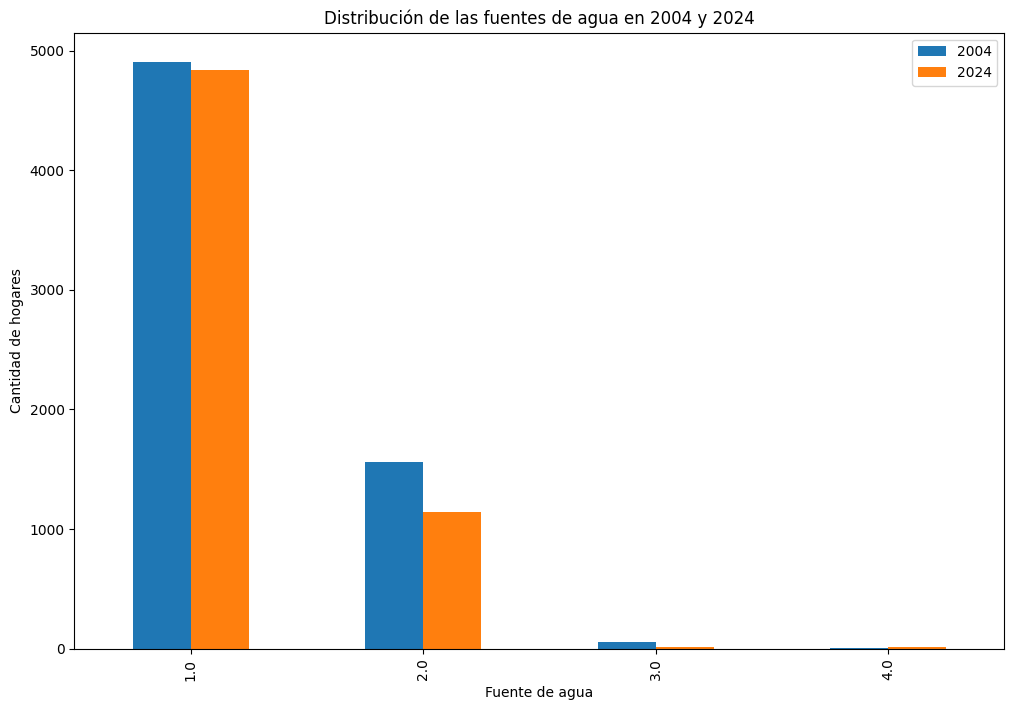

In [185]:
# Filter the data for each year
iv7_2004 = df_unificado[df_unificado['Año'] == 2004]['iv7'].value_counts().sort_index()
iv7_2024 = df_unificado[df_unificado['Año'] == 2024]['iv7'].value_counts().sort_index()

# Verificar los valores en iv7 para 2004 y 2024
print('Los valores que toma la variable iv7 en el 2004 son:', iv7_2004)
print('Los valores que toma la variable iv7 en el 2024 son:', iv7_2024)

# Create a DataFrame to hold the counts for each year
iv7_comparison = pd.DataFrame({'2004': iv7_2004, '2024': iv7_2024}).fillna(0)

# Plot the bar chart
iv7_comparison.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Fuente de agua')
plt.ylabel('Cantidad de hogares')
plt.title('Distribución de las fuentes de agua en 2004 y 2024')
plt.show()

Los valores que toma la variable iv9 en el 2004 son: iv9
1    6007
2     517
3       5
Name: count, dtype: int64
Los valores que toma la variable iv9 en el 2024 son: iv9
0      16
1    5883
2     115
Name: count, dtype: int64


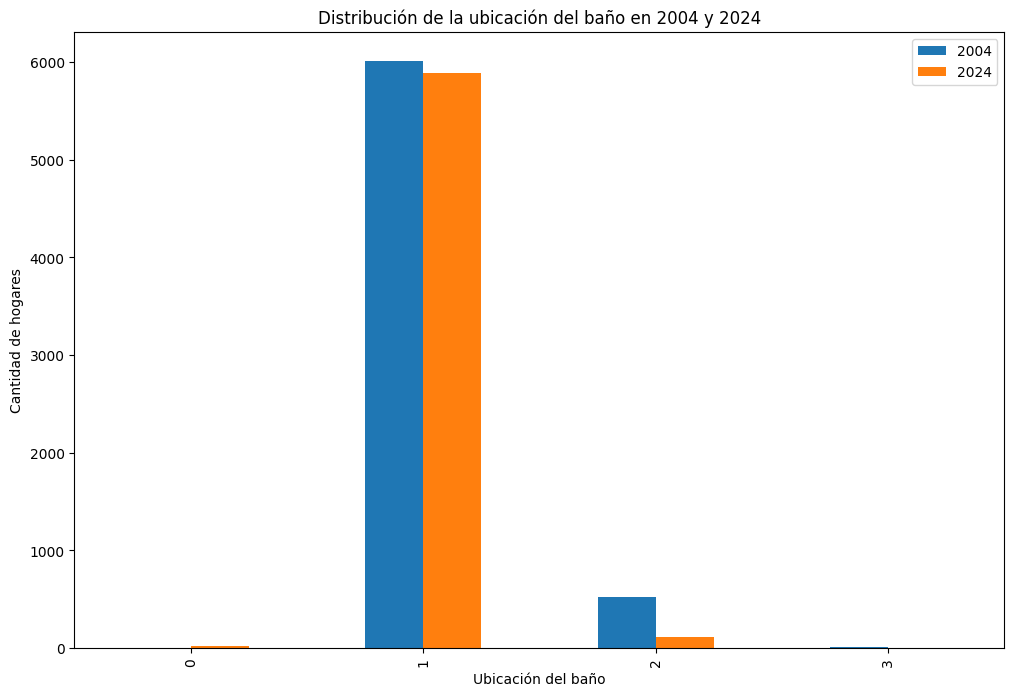

In [186]:
# Filter the data for each year
iv9_2004 = df_unificado[df_unificado['Año'] == 2004]['iv9'].value_counts().sort_index()
iv9_2024 = df_unificado[df_unificado['Año'] == 2024]['iv9'].value_counts().sort_index()

# Verificar los valores en iv9 para 2004 y 2024
print('Los valores que toma la variable iv9 en el 2004 son:', iv9_2004)
print('Los valores que toma la variable iv9 en el 2024 son:', iv9_2024)

# Create a DataFrame to hold the counts for each year
iv9_comparison = pd.DataFrame({'2004': iv9_2004, '2024': iv9_2024}).fillna(0)

# Plot the bar chart
iv9_comparison.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Ubicación del baño')
plt.ylabel('Cantidad de hogares')
plt.title('Distribución de la ubicación del baño en 2004 y 2024')
plt.show()

Por último, vamos a crear dummmys de todas las variables que son categóricas para las regresiones.

In [187]:
#Vamos a crear un mapeo que permita transformar las variables que toman 1 y 2 a binaria 
mapeo_bn = {1: 0, 2: 1}

for col in ['ch04', 'iv5', 'iv8', 'iv12_1', 'iv12_2', 'iv12_3', 'v1', 'v2', 'v21', 'v22', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b']:
    df_unificado[col] = df_unificado[col].map(mapeo_bn)  
    df_unificado[col] = pd.to_numeric(df_unificado[col], errors='coerce')

#Creamos dummies para iv1
dummies_iv1 = pd.get_dummies(df_unificado['iv1'], prefix='iv1', drop_first=False)

#Creamos dummies para iv2
dummies_iv2 = pd.get_dummies(df_unificado['iv2'], prefix='iv2', drop_first=False)

#Creamos dummies para iv3
dummies_iv3 = pd.get_dummies(df_unificado['iv3'], prefix='iv3', drop_first=False)

#Creamos dummies para iv4
dummies_iv4 = pd.get_dummies(df_unificado['iv4'], prefix='iv4', drop_first=False)

#Creamos dummies para iv6
dummies_iv6 = pd.get_dummies(df_unificado['iv6'], prefix='iv6', drop_first=False)

#Creamos dummies para iv7
dummies_iv7 = pd.get_dummies(df_unificado['iv7'], prefix='iv7', drop_first=False)

#Creamos dummies para iv9
dummies_iv9 = pd.get_dummies(df_unificado['iv9'], prefix='iv9', drop_first=False)

#Creamos dummies para iv10
dummies_iv10 = pd.get_dummies(df_unificado['iv10'], prefix='iv10', drop_first=False)

#Creamos dummies para iv11
dummies_iv11 = pd.get_dummies(df_unificado['iv11'], prefix='iv11', drop_first=False)

#Creamos dummies para ch07 
dummies_ch07 = pd.get_dummies(df_unificado['ch07'], prefix='ch07', drop_first=False)

#Cremamos dummies para ch08
dummies_ch08 = pd.get_dummies(df_unificado['ch08'], prefix='ch08', drop_first=False)

#Creamos dummies para ch09
dummies_ch09 = pd.get_dummies(df_unificado['ch09'], prefix='ch09', drop_first=False)

#Creamos dummies para ch15
dummies_ch15 = pd.get_dummies(df_unificado['ch15'], prefix='ch15', drop_first=False)

#Creamos dummies para ch16
dummies_ch16 = pd.get_dummies(df_unificado['ch16'], prefix='ch16', drop_first=False)

#Creamos dummies para nivel_ed
dummies_nivel_ed = pd.get_dummies(df_unificado['nivel_ed'], prefix='nivel_ed', drop_first=False)

#Creanis dummies para cat_inac
#dummies_cat_inac = pd.get_dummies(df_unificado['cat_inac'], prefix='cat_inac', drop_first=False)

#Creamos un nuevo dataframe con las variables dummies
df_unificado_2 = pd.concat([df_unificado, dummies_ch07, dummies_ch08, dummies_nivel_ed, dummies_ch09, dummies_ch15, dummies_ch16, dummies_iv1, dummies_iv2, dummies_iv3, dummies_iv4, dummies_iv6, dummies_iv7, dummies_iv9, dummies_iv10, dummies_iv11], axis=1)

print(df_unificado_2.columns)
print(df_unificado_2.head())

Index(['codusu', 'nro_hogar', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch15',
       'ch16', 'nivel_ed',
       ...
       'iv9_3', 'iv10_0.0', 'iv10_1.0', 'iv10_2.0', 'iv10_3.0', 'iv11_0',
       'iv11_1', 'iv11_2', 'iv11_3', 'iv11_4'],
      dtype='object', length=151)
     codusu  nro_hogar  ch04  ch06  ch07  ch08  ch09  ch15  ch16  nivel_ed  \
0  125098          1.0     0  79.0     4     1     1     1   1.0         3   
1  125397          1.0     1  67.0     3     2     1     2   1.0         2   
2  125515          1.0     1  74.0     4     1     1     1   1.0         2   
3  125558          1.0     0  54.0     2     3     1     1   1.0         2   
4  125558          1.0     1  51.0     2     3     1     1   1.0         6   

   ...  iv9_3  iv10_0.0  iv10_1.0  iv10_2.0  iv10_3.0  iv11_0  iv11_1  iv11_2  \
0  ...  False     False      True     False     False   False    True   False   
1  ...  False     False      True     False     False   False    True   False   
2  ...  False   

In [188]:
df_unificado_2.shape

(12543, 151)

#### Parte II: Clasificación y regularización

1. Para cada año, partan la base respondieron en una base de prueba y una de entrenamiento (X_train, y_train, X_test, y_test) utilizando
el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state
instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

Antes de hacer esto, sería importante considerar el feedback que nos dejó Nacho.
Parte II:
#### Creo que, si bien hicieron unas variables que tienen sentido ordinal, para los modelos hubiera creado dummies para las variables categóricas. Es más seguro.
- Habría que preguntarle si crear dummies para absolutamente todas las variables categóricas que tiene la base final.
#### Hay algún problema con la convergencia de la regresión logística, no termino de entender por qué.
- Si ahora la parte de preprocesamiento de datos está bien, esto no debería volver a pasar. 
#### Me gustan mucho las figuras de ROC de todos los modelos juntos, pero por algún motivo que no comprendo les dieron valores de Accuracy y AUC bastante peores que sus compañeras. Igual se los consideré bien porque los modelos están bien hechos (salvo el tema de las dummies).
- Idem al anterior
#### Definitivamente no hubiera utilizado la variable PEA para el entrenamiento de los modelos. Piensen que para crearla utilizaron la variable estado.
- Tener en mente la posibilidad de sacar las variables madres de otras variables que creemos. Si podemos pensar entre todas que variables que podamos crear nos evitaría tener tantas variables categóricas, como en el caso de PEA, nos ahorraría tiempo.
#### Sacar la variable estado de la base final

In [189]:
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import auc


Variables que hay que droppear: 'codusu', 'nro_hogar', 'ano4_x', 'ch04', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'pp02h', 'pp02i', 'ano4_y', 'iv5', 'iv12_1', 'v5', 'v6', 'v7', 'v11'

In [190]:
#hago solo un df con las variables dummisadas
df_regresion = df_unificado_2.drop(['codusu', 'nro_hogar', 'ch07', 'ch08', 'nivel_ed', 'estado', 'v5', 'v6', 'v7', 'v11', 'iv1', 'iv2', 'iv3', 'iv4', 'iv6', 'iv7', 'iv9', 'iv10', 'iv11', 'ch09', 'ch15', 'ch16'], axis=1)  
df_regresion.head()

,ch04,ch06,v2_m,v5_m,v8_m,v9_m,v10_m,v11_m,v12_m,v18_m,...,iv9_3,iv10_0.0,iv10_1.0,iv10_2.0,iv10_3.0,iv11_0,iv11_1,iv11_2,iv11_3,iv11_4
0,0,79.0,368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,False,False
1,1,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,False,False
2,1,74.0,240.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,...,False,False,True,False,False,False,True,False,False,False
3,0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,False,False
4,1,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,False,False


In [191]:
print(df_regresion['desocupado'].unique())

[0 1]


In [192]:
# Entrenaremos con el 70% de la base de datos del 2004 y el resto se usarán para testear 
# el modelo obtenido
# Split the data into training and testing sets
# Filtrar los datos para 2004
unificado_2004 = df_regresion[df_regresion['Año'] == 2004.0]

# Filtrar los datos para 2024
unificado_2024 = df_regresion[df_regresion['Año'] == 2024.0]

# Dividir los datos de 2004 en conjuntos de entrenamiento y prueba
train2004, test2004 = train_test_split(unificado_2004, test_size=0.3, random_state=101)

# Dividir los datos de 2024 en conjuntos de entrenamiento y prueba
train2024, test2024 = train_test_split(unificado_2024, test_size=0.3, random_state=101)
# Define the dependent variable y and the independent variables X
y_train_2004 = train2004[['desocupado']]
X_train_2004 = train2004.drop(columns=['desocupado'])

y_test_2004 = test2004[['desocupado']]
X_test_2004 = test2004.drop(columns=['desocupado'])

# Add a column of ones to X_train and X_test
X_train_2004 = X_train_2004.assign(intercept=1)
X_test_2004 = X_test_2004.assign(intercept=1)

# Repito lo mismo para el 2024
train2024, test2024 = train_test_split(unificado_2024, test_size=0.3, random_state=101)
# Define the dependent variable y and the independent variables X
y_test_2024 = test2024[['desocupado']]
X_test_2024 = test2024.drop(columns=['desocupado'])

y_train_2024 = train2024[['desocupado']]
X_train_2024 = train2024.drop(columns=['desocupado'])

In [193]:
y_train_2004 == 0

,desocupado
3135,False
2915,True
48,True
6497,True
6006,True
...,...
599,True
5736,True
1361,False
1547,True


In [194]:
# Revisamos cuantas observaciones quedaron para Test y cuantas para Entrenamiento.
print(f'El conjunto de entrenamiento del 2004 tiene {len(X_train_2004)} observaciones.')
print(f'El conjunto de test del 2004 tiene {len(X_test_2004)} observaciones.')
print(f'El conjunto de entrenamiento del 2024 tiene {len(X_train_2024)} observaciones.')
print(f'El conjunto de test del 2024 tiene {len(X_test_2024)} observaciones.')

El conjunto de entrenamiento del 2004 tiene 4570 observaciones.
El conjunto de test del 2004 tiene 1959 observaciones.
El conjunto de entrenamiento del 2024 tiene 4209 observaciones.
El conjunto de test del 2024 tiene 1805 observaciones.


Expliquen brevemente cómo elegirían λ por validación cruzada (en Python es alpha). Detallen por qué no usarían el conjunto de prueba (test) para su elección

En validación cruzada, ¿cuáles son las implicancias de usar un k muy
pequeño o uno muy grande? Cuando k = n (con n el número de
muestras), ¿cuántas veces se estima el modelo?

Para regresión logística, implementen la penalidad, L1 como la de
LASSO y L2 como la de Ridge con λ = 1 (como en la Tutorial 10), usando
la opción penalty y reporten la matriz de confusión, la curva ROC, los
valores de AUC y de Accuracy para cada año.1 ¿Cómo cambiaron los
resultados con respecto al TP3? ¿La performance de regresión logística
con regularización es mejor o peor?

In [195]:
#antes de hacer la regresión, necesitamos estandarizar las variables
# Estadisticas antes de estandarizar, base 2004
X_train_2004.describe().T

,count,mean,std,min,25%,50%,75%,max
ch04,4570.0,0.532823,0.498976,0.00,0.000000,1.000000,1.000000,1.0
ch06,4570.0,34.251641,22.537625,1.00,15.000000,31.000000,51.000000,94.0
v2_m,4570.0,44.280306,231.032670,0.00,0.000000,0.000000,0.000000,9999.0
v5_m,4570.0,2.304158,20.195679,0.00,0.000000,0.000000,0.000000,375.0
v8_m,4570.0,4.588621,68.495185,0.00,0.000000,0.000000,0.000000,3000.0
v9_m,4570.0,1.280088,61.293084,0.00,0.000000,0.000000,0.000000,4000.0
v10_m,4570.0,0.711160,31.208913,0.00,0.000000,0.000000,0.000000,1700.0
v11_m,4570.0,0.423851,16.304634,0.00,0.000000,0.000000,0.000000,1000.0
v12_m,4570.0,6.433698,59.423510,0.00,0.000000,0.000000,0.000000,2700.0
v18_m,4570.0,0.054705,2.371048,0.00,0.000000,0.000000,0.000000,140.0


In [196]:
# Estadisticas antes de estandarizar
X_train_2024.describe().T


,count,mean,std,min,25%,50%,75%,max
ch04,4209.0,0.515324,4.998245e-01,0.000000,0.00,1.000,1.000000,1.00
ch06,4209.0,37.148016,2.236479e+01,1.000000,18.00,35.000,54.000000,96.00
v2_m,4209.0,29943.177239,9.096673e+04,0.000000,0.00,0.000,0.000000,2000000.00
v5_m,4209.0,3494.754574,2.125054e+04,0.000000,0.00,0.000,0.000000,389000.00
v8_m,4209.0,2149.322880,3.547312e+04,0.000000,0.00,0.000,0.000000,1500000.00
v9_m,4209.0,28.510335,1.849659e+03,0.000000,0.00,0.000,0.000000,120000.00
v10_m,4209.0,8965.312426,4.654783e+05,0.000000,0.00,0.000,0.000000,30000000.00
v11_m,4209.0,201.045379,2.371276e+03,0.000000,0.00,0.000,0.000000,80000.00
v12_m,4209.0,1940.009503,1.750027e+04,0.000000,0.00,0.000,0.000000,420000.00
v18_m,4209.0,39.201711,1.812146e+03,0.000000,0.00,0.000,0.000000,110000.00


In [197]:
#primero para 2004
#  Iniciamos el Standard Scaler
sc = StandardScaler()

# Estandarizamos las observaciones de entrenamiento
X_train_2004_transformed = pd.DataFrame(sc.fit_transform(X_train_2004), index= X_train_2004.index, columns=X_train_2004.columns)

# Estandarizamos las observaciones de test
X_test_2004_transformed = pd.DataFrame(sc.transform(X_test_2004), index=X_test_2004.index, columns=X_test_2004.columns)

# Estadisticas luego de estandarizar
X_train_2004_transformed.describe().T


,count,mean,std,min,25%,50%,75%,max
ch04,4570.0,5.908233e-17,1.000109,-1.067949,-1.067949,0.936374,0.936374,0.936374
ch06,4570.0,4.975354e-17,1.000109,-1.475545,-0.854294,-0.144292,0.743210,2.651340
v2_m,4570.0,2.021238e-17,1.000109,-0.191684,-0.191684,-0.191684,-0.191684,43.092646
v5_m,4570.0,2.176717e-17,1.000109,-0.114104,-0.114104,-0.114104,-0.114104,18.456256
v8_m,4570.0,2.332197e-18,1.000109,-0.066999,-0.066999,-0.066999,-0.066999,43.736492
...,...,...,...,...,...,...,...,...
iv11_1,4570.0,8.551390e-18,1.000109,-0.984367,-0.984367,-0.984367,1.015881,1.015881
iv11_2,4570.0,-8.998394e-17,1.000109,-0.700734,-0.700734,-0.700734,1.427076,1.427076
iv11_3,4570.0,-4.508915e-17,1.000109,-0.460304,-0.460304,-0.460304,-0.460304,2.172475
iv11_4,4570.0,9.328789e-18,1.000109,-0.061105,-0.061105,-0.061105,-0.061105,16.365315


In [198]:
#ahora para 2024
#  Iniciamos el Standard Scaler
sc = StandardScaler()

# Estandarizamos las observaciones de entrenamiento
X_train_2024_transformed = pd.DataFrame(sc.fit_transform(X_train_2024), index=X_train_2024.index, columns=X_train_2024.columns)

# Estandarizamos las observaciones de test
X_test_2024_transformed = pd.DataFrame(sc.transform(X_test_2024), index=X_test_2024.index, columns=X_test_2024.columns)

# Estadisticas luego de estandarizar
X_train_2024_transformed.describe().T


,count,mean,std,min,25%,50%,75%,max
ch04,4209.0,2.869857e-17,1.000119,-1.031133,-1.031133,0.969807,0.969807,0.969807
ch06,4209.0,1.114180e-16,1.000119,-1.616484,-0.856270,-0.096056,0.753595,2.631770
v2_m,4209.0,1.055094e-17,1.000119,-0.329205,-0.329205,-0.329205,-0.329205,21.659467
v5_m,4209.0,-1.688151e-17,1.000119,-0.164474,-0.164474,-0.164474,-0.164474,18.143114
v8_m,4209.0,1.688151e-17,1.000119,-0.060597,-0.060597,-0.060597,-0.060597,42.229961
...,...,...,...,...,...,...,...,...
iv11_0,4209.0,-3.123079e-17,1.000119,-0.055661,-0.055661,-0.055661,-0.055661,17.965779
iv11_1,4209.0,1.190146e-16,1.000119,-1.495892,-1.495892,0.668498,0.668498,0.668498
iv11_2,4209.0,-3.882747e-17,1.000119,-0.540642,-0.540642,-0.540642,-0.540642,1.849654
iv11_3,4209.0,-4.811230e-17,1.000119,-0.292632,-0.292632,-0.292632,-0.292632,3.417267


Ahora si, comenzamos con las regresiones

In [199]:
# Crear y ajustar el modelo para 2004
ridge_logistic_2004 = LogisticRegression(penalty='l2', C=1, solver='lbfgs', random_state=101)
ridge_logistic_2004.fit(X_train_2004_transformed, y_train_2004)

# Hacer predicciones y evaluar el modelo para 2004
y_test_pred_score_ridge_2004 = ridge_logistic_2004.predict_proba(X_test_2004_transformed)[:,1]
y_pred_2004_ridge = ridge_logistic_2004.predict(X_test_2004_transformed)
accuracy_2004_ridge = accuracy_score(y_test_2004, y_pred_2004_ridge)
ecm_ridge_2004 = mean_squared_error(y_test_2004, y_pred_2004_ridge)


print("Resultados para 2004:")
print(f"Accuracy: {accuracy_2004_ridge}")
print("MSE: ", ecm_ridge_2004)
print("Classification Report:")
print(classification_report(y_test_2004, y_pred_2004_ridge))
# Si quieres ver los coeficientes de los modelos
print("\nCoeficientes del modelo 2004:")
print(ridge_logistic_2004.coef_)

Resultados para 2004:
Accuracy: 0.9264931087289433
MSE:  0.07350689127105667
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1806
           1       0.62      0.16      0.25       153

    accuracy                           0.93      1959
   macro avg       0.77      0.57      0.61      1959
weighted avg       0.91      0.93      0.91      1959


Coeficientes del modelo 2004:
[[ 2.68986336e-01 -3.42061675e-01  2.63252403e-01  1.83383719e-03
   1.53378452e-01 -5.03390815e-01 -9.29023116e-04  3.20350331e-02
   2.01994085e-01  1.67480940e-01  0.00000000e+00 -3.84339240e-02
  -2.57856625e+00 -3.46287387e-02  0.00000000e+00  7.06810209e-02
   7.15026798e-02  4.21640170e-03  2.64897745e-02  1.04031472e+00
  -9.72084940e-02 -1.22469969e-01 -2.06512726e-02  2.32354491e-02
  -2.31298340e-01 -5.93653040e-03 -1.70981871e-01  2.06355996e-01
  -3.53207290e-02  3.90103876e-02 -4.86066213e-02 -1.86631821e-01
  -1.69180129e

c:\Users\s1248850\AppData\Local\anaconda3\envs\Rosario\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [200]:
# Crear y ajustar el modelo para 2024 co ridge
ridge_logistic_2024 = LogisticRegression(penalty='l2', C=1, solver='lbfgs', random_state=101)
ridge_logistic_2024.fit(X_train_2024_transformed, y_train_2024)

# Hacer predicciones y evaluar el modelo para 2024
y_test_pred_score_ridge_2024 = ridge_logistic_2024.predict_proba(X_test_2024_transformed)[:,1]
y_pred_2024_ridge = ridge_logistic_2024.predict(X_test_2024_transformed)
accuracy_2024_ridge = accuracy_score(y_test_2024, y_pred_2024_ridge)
ecm_ridge_2024 = mean_squared_error(y_test_2024, y_pred_2024_ridge)



print("Resultados para 2024:")
print(f"Accuracy: {accuracy_2024_ridge}")
print("MSE: ", ecm_ridge_2024)
print("Classification Report:")
print(classification_report(y_test_2024, y_pred_2024_ridge))
print("\nCoeficientes del modelo 2024:")
print(ridge_logistic_2024.coef_)

Resultados para 2024:
Accuracy: 0.9534626038781163
MSE:  0.04653739612188366
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1721
           1       0.50      0.12      0.19        84

    accuracy                           0.95      1805
   macro avg       0.73      0.56      0.58      1805
weighted avg       0.94      0.95      0.94      1805


Coeficientes del modelo 2024:
[[ 6.42573915e-02 -8.16251219e-01  2.94196988e-01  3.23210462e-02
   1.24695479e-02 -1.78184739e-02 -1.09503333e-02 -8.65428098e-03
   1.67611408e-02 -7.73493108e-02  0.00000000e+00  3.04558766e-02
  -1.03099786e+00 -8.94465638e-02 -9.11163630e-04  2.29520500e-02
   1.71420636e-01  1.32823925e-02  8.36681785e-02  6.28978372e-01
   5.45728109e-02 -1.58829146e-01  1.12181104e-01  2.16758575e-02
   1.45312718e-01 -7.41925679e-03  1.29570381e-01  1.07356385e-01
  -1.19928584e-01  1.06368531e-01 -1.23159905e-01  5.31374450e-02
   7.91250160e

c:\Users\s1248850\AppData\Local\anaconda3\envs\Rosario\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regulación con Lasso 

In [201]:
#2004
# C es el inverso de la fuerza de regularización
# Valores más pequeños de C aumentan la regularización
lasso_logistic_2004 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=101)
lasso_logistic_2004.fit(X_train_2004_transformed, y_train_2004)
y_pred_2004_lasso = lasso_logistic_2004.predict(X_test_2004_transformed)
y_test_pred_score_lasso_2004 = lasso_logistic_2004.predict_proba(X_test_2004)[:,1]
accuracy_2004_lasso = accuracy_score(y_test_2004, y_pred_2004_lasso)
ecm_lasso_2004 = mean_squared_error(y_test_2004, y_pred_2004_lasso)
print(f"Accuracy: {accuracy_2004_lasso}")
print("MSE", ecm_lasso_2004)    
print("Coeficientes:")
for feature, coef in zip(X_train_2024.columns, lasso_logistic_2004.coef_[0]):
    print(f"{feature}: {coef}")

c:\Users\s1248850\AppData\Local\anaconda3\envs\Rosario\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.927003573251659
MSE 0.07299642674834099
Coeficientes:
ch04: 0.26163697720057494
ch06: -0.32730215096115595
v2_m: 0.29328823673038
v5_m: 0.03279685321735145
v8_m: 0.15159894523030593
v9_m: -0.04776378436669652
v10_m: 0.0
v11_m: 0.030998925129508782
v12_m: 0.20464105427529702
v18_m: 0.13955249920686696
v19_am: 0.0
v21_m: -0.0021250955607576513
ipcf: -3.6077047280681493
iv5: -0.02406282701417565
iv8: 0.0
iv12_1: 0.058800944679371615
iv12_2: 0.055914655412217226
iv12_3: 0.0009618504089192111
ii6_1: 0.018544380269865875
v1: 1.0275747090021983
v2: -0.09533393369050754
v21: -0.10837194735370073
v22: -0.010886155638441058
v3: 0.01823483639772882
v4: -0.22619480621521695
v8: 0.0
v9: -0.1296066970560537
v10: 0.10847995986610971
v12: -0.03891315469094858
v13: 0.024625693353589564
v14: -0.04239676365886594
v15: -0.1775552116871267
v16: -0.17113230612172098
v17: -0.06842317265059394
v18: 0.06625957558071101
v19_a: 0.11630668085165478
v19_b: 0.0
ix_tot: 0.0
ix_mayeq10: 0.0
itf: 0.1625586

In [202]:
#2024
# C es el inverso de la fuerza de regularización
# Valores más pequeños de C aumentan la regularización
lasso_logistic_2024 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=101)
lasso_logistic_2024.fit(X_train_2024_transformed, y_train_2024)
y_pred_2024_lasso = lasso_logistic_2024.predict(X_test_2024_transformed)
y_test_pred_score_lasso_2024 = lasso_logistic_2024.predict_proba(X_test_2024)[:,1]
accuracy_2024_lasso = accuracy_score(y_test_2024, y_pred_2024_lasso)
ecm_lasso_2024 = mean_squared_error(y_test_2024, y_pred_2024_lasso)
print(f"Accuracy: {accuracy_2024_lasso}")
print("MSE", ecm_lasso_2024)    
print("Coeficientes:")
for feature, coef in zip(X_train_2024.columns, lasso_logistic_2024.coef_[0]):
    print(f"{feature}: {coef}")

c:\Users\s1248850\AppData\Local\anaconda3\envs\Rosario\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9529085872576177
MSE 0.04709141274238227
Coeficientes:
ch04: 0.06476544071994257
ch06: -0.8104515227400221
v2_m: 0.3008967965981629
v5_m: 0.02070638770441519
v8_m: 0.0
v9_m: 0.0
v10_m: 0.0
v11_m: -0.003299204227428089
v12_m: 0.014407319647610137
v18_m: 0.0
v19_am: 0.0
v21_m: 0.0
ipcf: -0.8968901060919978
iv5: -0.07316578199456275
iv8: 0.0
iv12_1: 0.011032048639204851
iv12_2: 0.16373581118338726
iv12_3: 0.005606775122489594
ii6_1: 0.07562263910912594
v1: 0.6356275372694735
v2: 0.03918171082377413
v21: -0.14536296339548155
v22: 0.10684662306777667
v3: 0.01180124744809038
v4: 0.05357171498894441
v8: 0.0
v9: 0.058720905442165156
v10: 0.09132534679996901
v12: -0.11283066546224478
v13: 0.09213956693712297
v14: -0.11268820365605858
v15: 0.0500249852763227
v16: 0.07164492783804088
v17: -0.09011739502788654
v18: 0.16343585024753252
v19_a: 0.0
v19_b: 0.07810197776521771
ix_tot: 0.0
ix_mayeq10: 0.003968095044037807
itf: 0.42242442239934763
Año: 0.0
PEA: 3.300557527064436
PET: -0.05127

Entonces, quedamos que para Ridge el alpha es 1 y para Lasso el lambda es 0.005 (esto es antes de hacer las dummies)

Evaluamos la performance de los modelos con ridge y lasso

In [203]:
print("Error cuadrático medio con Ridge en 2004: ", ecm_ridge_2004)
print("Error cuadrático medio con Lasso en 2004: ", ecm_lasso_2004)
print("Error cuadrático medio con Ridge en 2024: ", ecm_ridge_2024)
print("Error cuadrático medio con Lasso en 2024: ", ecm_lasso_2024)

Error cuadrático medio con Ridge en 2004:  0.07350689127105667
Error cuadrático medio con Lasso en 2004:  0.07299642674834099
Error cuadrático medio con Ridge en 2024:  0.04653739612188366
Error cuadrático medio con Lasso en 2024:  0.04709141274238227


Matriz de confusión

Primero con ridge para 2004 y 2024

In [204]:
# Primero calculamos la matriz de confusión para la regresión del año 2004.
tn_log_2004_ridge, fp_log_2004_ridge, fn_log_2004_ridge, tp_log_2004_ridge = confusion_matrix(y_test_2004, y_pred_2004_ridge).ravel()   # Ravel transforma la matriz en un 1D array

print("Verdadero 0: ", tn_log_2004_ridge)
print("Falso 1: ", fp_log_2004_ridge)
print("Falso 0: ", fn_log_2004_ridge)
print("Verdadero 1: ", tp_log_2004_ridge)

Verdadero 0:  1791
Falso 1:  15
Falso 0:  129
Verdadero 1:  24


In [205]:
# Primero calculamos la matriz de confusión para la regresión del año 2024.
tn_log_2024_ridge, fp_log_2024_ridge, fn_log_2024_ridge, tp_log_2024_ridge = confusion_matrix(y_test_2024, y_pred_2024_ridge).ravel()   # Ravel transforma la matriz en un 1D array

print("Verdadero 0: ", tn_log_2024_ridge)
print("Falso 1: ", fp_log_2024_ridge)
print("Falso 0: ", fn_log_2024_ridge)
print("Verdadero 1: ", tp_log_2024_ridge)

Verdadero 0:  1711
Falso 1:  10
Falso 0:  74
Verdadero 1:  10


Matrices para lasso 2024

In [206]:
# Primero calculamos la matriz de confusión para la regresión del año 2004.
tn_log_2004_lasso, fp_log_2004_lasso, fn_log_2004_lasso, tp_log_2004_lasso = confusion_matrix(y_test_2004, y_pred_2004_lasso).ravel()   # Ravel transforma la matriz en un 1D array

print("Verdadero 0: ", tn_log_2004_lasso)
print("Falso 1: ", fp_log_2004_lasso)
print("Falso 0: ", fn_log_2004_lasso)
print("Verdadero 1: ", tp_log_2004_lasso)

Verdadero 0:  1793
Falso 1:  13
Falso 0:  130
Verdadero 1:  23


In [207]:
# Calculamos la matriz de confusión para la regresión del año 2024.
tn_log_2024_lasso, fp_log_2024_lasso, fn_log_2024_lasso, tp_log_2024_lasso = confusion_matrix(y_test_2024, y_pred_2024_lasso).ravel()   # Ravel transforma la matriz en un 1D array

print("Verdadero 0: ", tn_log_2024_lasso)
print("Falso 1: ", fp_log_2024_lasso)
print("Falso 0: ", fn_log_2024_lasso)
print("Verdadero 1: ", tp_log_2024_lasso)

Verdadero 0:  1712
Falso 1:  9
Falso 0:  76
Verdadero 1:  8


AUC y ROC

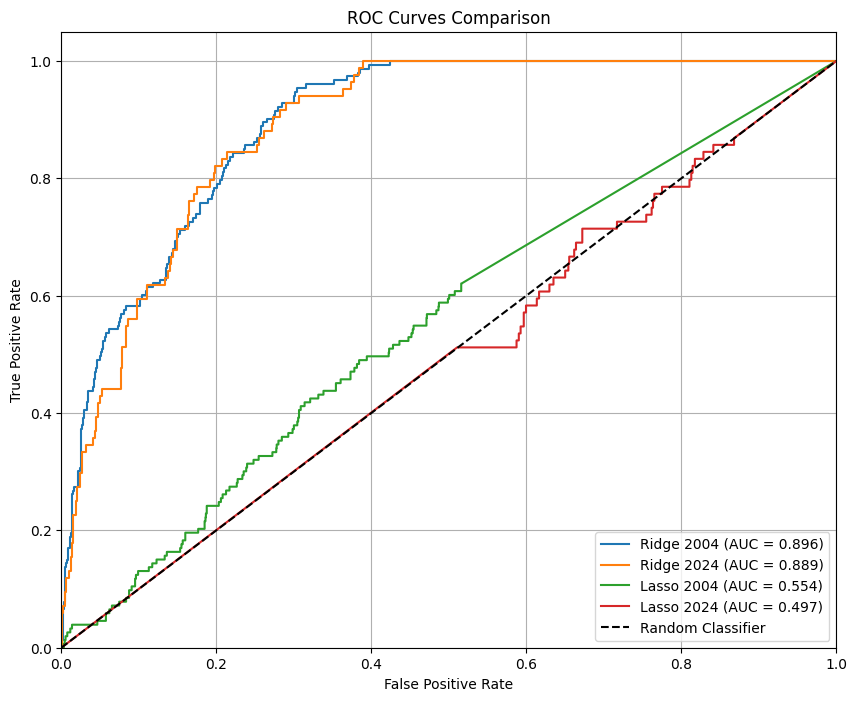

AUC Scores:
Ridge 2004: 0.8956
Ridge 2024: 0.8891
Lasso 2004: 0.5543
Lasso 2024: 0.4967


In [208]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

models = {
    'Ridge 2004': (y_test_2004, y_test_pred_score_ridge_2004),
    'Ridge 2024': (y_test_2024, y_test_pred_score_ridge_2024),
    'Lasso 2004': (y_test_2004, y_test_pred_score_lasso_2004),
    'Lasso 2024': (y_test_2024, y_test_pred_score_lasso_2024)
}

plt.figure(figsize=(10, 8))

for name, (y_true, y_score) in models.items():
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Imprimir AUC scores
print("AUC Scores:")
for name, (y_true, y_score) in models.items():
    auc = roc_auc_score(y_true, y_score)
    print(f"{name}: {auc:.4f}")

5. Realicen un barrido en = 10n λ con n ∈ {−5, −4, −3 ..., +4, +5} y utilicen
10-fold CV para elegir el λ óptimo en regresión logística con Ridge y con
LASSO. ¿Qué λ seleccionó en cada caso? Usando la librería de seaborn,
generen box plot mostrando la distribución del error de predicción para
cada λ. Cada box debe corresponder a un valor de λ y contener como
observaciones el error medio de validación (MSE) para cada partición.
Además, para la regularización LASSO, generen un line plot del
promedio de la proporción de variables ignoradas por el modelo en
función de λ (como vieron en el tutorial 10), es decir la proporción de
variables para las cuales el coeficiente asociado es cero.

In [214]:
from sklearn.linear_model import LogisticRegressionCV
import numpy as np


# Definir los valores de lambda (C en LogisticRegressionCV es el inverso de lambda)
lambdas = np.logspace(-5, 5, 11)
Cs = 1 / lambdas

# Regresión logística con Ridge
ridge_model_2004 = LogisticRegressionCV(Cs=Cs, cv=10, penalty='l2', solver='liblinear', scoring='accuracy', max_iter=10000)
ridge_model_2004.fit(X_train_2004_transformed, y_train_2004)

ridge_model_2024 = LogisticRegressionCV(Cs=Cs, cv=10, penalty='l2', solver='liblinear', scoring='accuracy', max_iter=10000)
ridge_model_2024.fit(X_train_2024_transformed, y_train_2024)

#Predicciones
y_pred_2004_ridge_CV = ridge_model_2004.predict(X_test_2004_transformed)
y_test_pred_score_ridge_2004_CV = ridge_model_2004.predict_proba(X_test_2004)[:,1]

y_pred_2024_ridge_CV = ridge_model_2024.predict(X_test_2024_transformed)
y_test_pred_score_ridge_2024_CV = ridge_model_2024.predict_proba(X_test_2024)[:,1]

c:\Users\s1248850\AppData\Local\anaconda3\envs\Rosario\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\s1248850\AppData\Local\anaconda3\envs\Rosario\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [212]:
# Regresión logística con LASSO
lasso_model_2004 = LogisticRegressionCV(Cs=Cs, cv=10, penalty='l1', solver='liblinear', scoring='accuracy', max_iter=10000)
lasso_model_2004.fit(X_train_2004_transformed, y_train_2004)

c:\Users\s1248850\AppData\Local\anaconda3\envs\Rosario\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=array([1.e+05, 1.e+04, 1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 1.e-05]),
                     cv=10, max_iter=10000, penalty='l1', scoring='accuracy',
                     solver='liblinear')

In [213]:
lasso_model_2024 = LogisticRegressionCV(Cs=Cs, cv=10, penalty='l1', solver='liblinear', scoring='accuracy', max_iter=10000)
lasso_model_2024.fit(X_train_2024_transformed, y_train_2024)

c:\Users\s1248850\AppData\Local\anaconda3\envs\Rosario\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=array([1.e+05, 1.e+04, 1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 1.e-05]),
                     cv=10, max_iter=10000, penalty='l1', scoring='accuracy',
                     solver='liblinear')

In [215]:
#Predicciones
y_pred_2004_lasso_CV = lasso_model_2004.predict(X_test_2004_transformed)
y_test_pred_score_lasso_2004_CV = lasso_model_2004.predict_proba(X_test_2004)[:,1]

y_pred_2024_lasso_CV = lasso_model_2024.predict(X_test_2024_transformed)
y_test_pred_score_lasso_2024_CV = lasso_model_2024.predict_proba(X_test_2024)[:,1]

In [216]:
# Obtener el lambda óptimo para cada modelo
optimal_lambda_ridge_2004 = 1 / ridge_model_2004.C_[0]
optimal_lambda_lasso_2004 = 1 / lasso_model_2004.C_[0]
optimal_lambda_ridge_2024 = 1 / ridge_model_2024.C_[0]
optimal_lambda_lasso_2024 = 1 / lasso_model_2024.C_[0]

print(f"Lambda óptimo para Ridge: {optimal_lambda_ridge_2004}")
print(f"Lambda óptimo para Ridge: {optimal_lambda_ridge_2024}")
print(f"Lambda óptimo para LASSO: {optimal_lambda_lasso_2024}")
print(f"Lambda óptimo para LASSO: {optimal_lambda_lasso_2024}")

Lambda óptimo para Ridge: 1.0
Lambda óptimo para Ridge: 10.0
Lambda óptimo para LASSO: 10.0
Lambda óptimo para LASSO: 10.0


C:\Users\s1248850\AppData\Local\Temp\ipykernel_28252\3934013460.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(np.round(lambdas, 5), rotation=45)
C:\Users\s1248850\AppData\Local\Temp\ipykernel_28252\3934013460.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(np.round(lambdas, 5), rotation=45)
C:\Users\s1248850\AppData\Local\Temp\ipykernel_28252\3934013460.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.round(lambdas, 5), rotation=45)
C:\Users\s1248850\AppData\Local\Temp\ipykernel_28252\3934013460.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xtickla

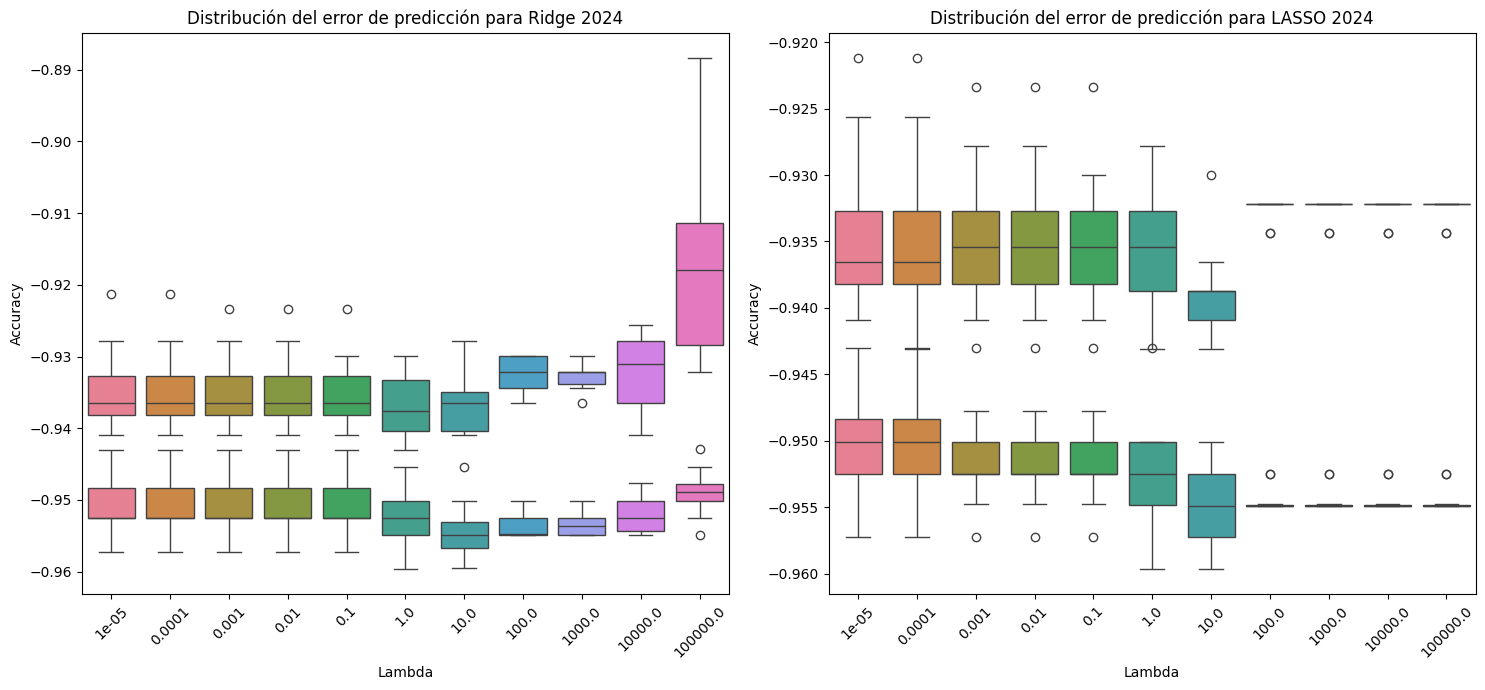

In [217]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Obtener los errores de validación para cada lambda
ridge_errors_2004 = -ridge_model_2004.scores_[1]  # Cambiar índice si la clase positiva no es '1'
ridge_errors_2024 = -ridge_model_2024.scores_[1]  # Cambiar índice si la clase positiva no es '1'
lasso_errors_2004 = -lasso_model_2004.scores_[1]
lasso_errors_2024 = -lasso_model_2024.scores_[1]


# Crear box plots para la distribución del error de predicción para cada lambda
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.boxplot(data=ridge_errors_2004, ax=axes[0])
axes[0].set_title('Distribución del error de predicción para Ridge 2004')
axes[0].set_xlabel('Lambda')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticklabels(np.round(lambdas, 5), rotation=45)

sns.boxplot(data=ridge_errors_2024, ax=axes[0])
axes[0].set_title('Distribución del error de predicción para Ridge 2024')
axes[0].set_xlabel('Lambda')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticklabels(np.round(lambdas, 5), rotation=45)

sns.boxplot(data=lasso_errors_2004, ax=axes[1])
axes[1].set_title('Distribución del error de predicción para LASSO 2004')
axes[1].set_xlabel('Lambda')
axes[1].set_ylabel('Accuracy')
axes[1].set_xticklabels(np.round(lambdas, 5), rotation=45)

sns.boxplot(data=lasso_errors_2024, ax=axes[1])
axes[1].set_title('Distribución del error de predicción para LASSO 2024')
axes[1].set_xlabel('Lambda')
axes[1].set_ylabel('Accuracy')
axes[1].set_xticklabels(np.round(lambdas, 5), rotation=45)

plt.tight_layout()
plt.show()


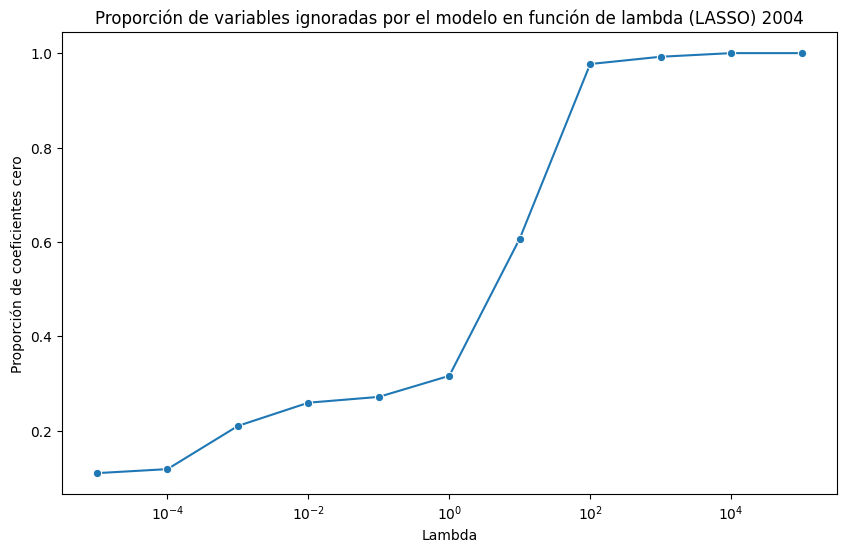

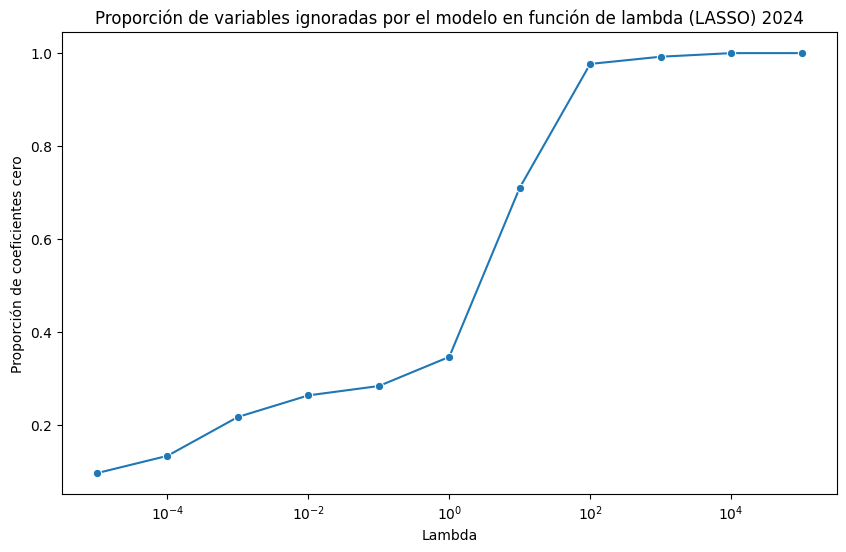

In [218]:
# Proporción de variables ignoradas por el modelo en función de lambda para LASSO
coef_lasso_2004 = np.array([
    np.mean(np.abs(lasso_model_2004.coefs_paths_[1][:, i]) == 0) for i in range(len(lambdas))
])
plt.figure(figsize=(10, 6))
sns.lineplot(x=lambdas, y=coef_lasso_2004, marker='o')
plt.xscale('log')
plt.title('Proporción de variables ignoradas por el modelo en función de lambda (LASSO) 2004')
plt.xlabel('Lambda')
plt.ylabel('Proporción de coeficientes cero')
plt.show() 

# Proporción de variables ignoradas por el modelo en función de lambda para LASSO
coef_lasso_2024 = np.array([
    np.mean(np.abs(lasso_model_2024.coefs_paths_[1][:, i]) == 0) for i in range(len(lambdas))
])

plt.figure(figsize=(10, 6))
sns.lineplot(x=lambdas, y=coef_lasso_2024, marker='o')
plt.xscale('log')
plt.title('Proporción de variables ignoradas por el modelo en función de lambda (LASSO) 2024')
plt.xlabel('Lambda')
plt.ylabel('Proporción de coeficientes cero')
plt.show()

6. En el caso del valor óptimo de λ para LASSO encontrado en el inciso
anterior, ¿qué variables fueron descartadas? ¿Son las que hubieran
esperado? ¿Tiene relación con lo que respondieron en el inciso 1 de la
Parte I?

In [219]:
# Obtener los coeficientes del modelo LASSO con el valor óptimo de λ
lasso_coefs_2004 = lasso_model_2004.coef_.flatten()
lasso_coefs_2024 = lasso_model_2024.coef_.flatten()
# Identificar las variables descartadas (coeficientes iguales a cero)
variables_descartadas_2004 = X_train_2004_transformed.columns[lasso_coefs_2004 == 0]
variables_descartadas_2024 = X_train_2024_transformed.columns[lasso_coefs_2024 == 0]
print("Variables descartadas por el modelo LASSO 2004:")
print(variables_descartadas_2004)
print("Variables descartadas por el modelo LASSO 2024:")
print(variables_descartadas_2024)

Variables descartadas por el modelo LASSO 2004:
Index(['v9_m', 'v10_m', 'v11_m', 'v19_am', 'v21_m', 'iv5', 'iv8', 'iv12_3',
       'ii6_1', 'v22', 'v3', 'v8', 'v10', 'v13', 'v19_b', 'ix_tot', 'Año',
       'PET', 'prop_ocupados', 'prop_subsidio', 'prop_mayores_10', 'ch07_1',
       'ch07_2', 'ch07_4', 'ch08_3', 'ch08_4', 'ch08_23', 'nivel_ed_1',
       'nivel_ed_3', 'nivel_ed_6', 'nivel_ed_7', 'ch09_1', 'ch09_2', 'ch09_3',
       'ch15_1', 'ch15_3', 'ch15_5', 'ch16_1.0', 'ch16_2.0', 'ch16_5.0',
       'ch16_6.0', 'iv1_2.0', 'iv1_4.0', 'iv1_5.0', 'iv2_1.0', 'iv2_3.0',
       'iv2_8.0', 'iv2_11.0', 'iv2_12.0', 'iv2_31.0', 'iv2_33.0', 'iv2_99.0',
       'iv3_2', 'iv3_4', 'iv4_1.0', 'iv4_2.0', 'iv4_3.0', 'iv4_5.0', 'iv4_6.0',
       'iv4_7.0', 'iv6_1', 'iv6_2', 'iv7_1.0', 'iv7_2.0', 'iv9_0', 'iv9_1',
       'iv9_2', 'iv9_3', 'iv10_0.0', 'iv10_1.0', 'iv10_2.0', 'iv10_3.0',
       'iv11_0', 'iv11_3', 'intercept'],
      dtype='object')
Variables descartadas por el modelo LASSO 2024:
Index(['

7. Elijan alguno de los modelos de regresión logística donde hayan probado
distintos parámetros de regularización y comenten: Compare los
resultados de 2004 versus 2024, ¿qué método de regularización funcionó
mejor: Ridge o LASSO? ¿LASSO hizo una selección distinta de
predictores en 2004 versus 2024? Comenten mencionando el error
cuadrático medio (MSE).

In [220]:
from sklearn.metrics import mean_squared_error

accuracy_2004_ridge_CV = accuracy_score(y_test_2004, y_pred_2004_ridge_CV)
ecm_ridge_2004_CV = mean_squared_error(y_test_2004, y_pred_2004_ridge_CV)

print("Resultados para 2004:")
print(f"Accuracy: {accuracy_2004_ridge_CV}")
print("MSE: ", ecm_ridge_2004_CV)

accuracy_2024_ridge_CV = accuracy_score(y_test_2024, y_pred_2024_ridge_CV)
ecm_ridge_2024_CV = mean_squared_error(y_test_2024, y_pred_2024_ridge_CV)


print("Resultados para 2024:")
print(f"Accuracy: {accuracy_2024_ridge_CV}")
print("MSE: ", ecm_ridge_2024_CV)

Resultados para 2004:
Accuracy: 0.9264931087289433
MSE:  0.07350689127105667
Resultados para 2024:
Accuracy: 0.9551246537396122
MSE:  0.04487534626038781


In [221]:
accuracy_2004_lasso_CV = accuracy_score(y_test_2004, y_pred_2004_lasso_CV)
ecm_lasso_2004_CV = mean_squared_error(y_test_2004, y_pred_2004_lasso_CV)

print("Resultados para 2004:")
print(f"Accuracy: {accuracy_2004_lasso_CV}")
print("MSE: ", ecm_lasso_2004_CV)

accuracy_2024_lasso_CV = accuracy_score(y_test_2024, y_pred_2024_lasso_CV)
ecm_lasso_2024_CV = mean_squared_error(y_test_2024, y_pred_2024_lasso_CV)


print("Resultados para 2024:")
print(f"Accuracy: {accuracy_2024_lasso_CV}")
print("MSE: ", ecm_lasso_2024_CV)

Resultados para 2004:
Accuracy: 0.925472179683512
MSE:  0.07452782031648801
Resultados para 2024:
Accuracy: 0.9562326869806094
MSE:  0.04376731301939058
